**IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
from scipy.stats import f
from scipy.stats.mstats import winsorize
import geopandas as gpd
sns.set_style('darkgrid')
sns.set(font_scale=2)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

**IMPORT FILES**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Food Insecurity.xlsx to Food Insecurity.xlsx
Saving GDP.xlsx to GDP.xlsx
Saving SH_STA_ANEM_NPRG.xlsx to SH_STA_ANEM_NPRG.xlsx
Saving SH_STA_ANEM_PREG.xlsx to SH_STA_ANEM_PREG.xlsx
Saving SH_STA_STNT.xlsx to SH_STA_STNT.xlsx
Saving SN_ITK_DEFC.xlsx to SN_ITK_DEFC.xlsx
Saving SN_STA_OVWGT.xlsx to SN_STA_OVWGT.xlsx


**READ IMPORT FILES**

In [3]:
data1 = pd.read_excel('SH_STA_STNT.xlsx')
data2 = pd.read_excel('GDP.xlsx')
data3 = pd.read_excel('Food Insecurity.xlsx')
data4 = pd.read_excel('SN_ITK_DEFC.xlsx')
data5 = pd.read_excel('SH_STA_ANEM_PREG.xlsx')
data6 = pd.read_excel('SN_STA_OVWGT.xlsx')
data7 = pd.read_excel('SH_STA_ANEM_NPRG.xlsx')

**DESCRIBE DATA 1**

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Goal                159 non-null    int64  
 1   Target              159 non-null    float64
 2   Indicator           159 non-null    object 
 3   SeriesCode          159 non-null    object 
 4   SeriesDescription   159 non-null    object 
 5   GeoAreaCode         159 non-null    int64  
 6   GeoAreaName         159 non-null    object 
 7   Age                 159 non-null    object 
 8   Location            0 non-null      float64
 9   Observation Status  159 non-null    object 
 10  Reporting Type      159 non-null    object 
 11  Units               159 non-null    object 
 12  2012                159 non-null    float64
 13  2013                159 non-null    float64
 14  2014                159 non-null    float64
 15  2015                159 non-null    float64
 16  2016    

**DROP COLUMNS**

In [5]:
data1 = data1.drop(columns=['Goal','Target','Indicator','SeriesCode','SeriesDescription','Age','Location','Observation Status','Reporting Type','Units'])

In [6]:
data1 = data1.drop(columns=['2012','2013','2014','2022'])

**RENAME**

In [7]:
data1.rename(columns={
'2015' : 'ST_2015',
'2016' : 'ST_2016',
'2017' : 'ST_2017',
'2018' : 'ST_2018',
'2019' : 'ST_2019',
'2020' : 'ST_2020',
'2021' : 'ST_2021',
}, inplace=True)

**DESCRIBE DATA2**

In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   2015            258 non-null    float64
 5   2016            258 non-null    float64
 6   2017            258 non-null    float64
 7   2018            258 non-null    float64
 8   2019            257 non-null    float64
 9   2020            257 non-null    float64
 10  2021            251 non-null    float64
 11  2022            233 non-null    float64
dtypes: float64(8), object(4)
memory usage: 25.1+ KB


**RENAME**

In [9]:
data2.rename(columns={"Country Name": "GeoAreaName"}, inplace=True)
data2.rename(columns={
'2015' : 'GDP_2015',
'2016' : 'GDP_2016',
'2017' : 'GDP_2017',
'2018' : 'GDP_2018',
'2019' : 'GDP_2019',
'2020' : 'GDP_2020',
'2021' : 'GDP_2021',
'2022' : 'GDP_2022',
}, inplace=True)

**DROP COLUMNS**

In [10]:
data2 = data2.drop(columns=['Country Code','Indicator Name','Indicator Code'])

In [11]:
data2 = data2.drop(columns=['GDP_2022'])

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GeoAreaName  266 non-null    object 
 1   GDP_2015     258 non-null    float64
 2   GDP_2016     258 non-null    float64
 3   GDP_2017     258 non-null    float64
 4   GDP_2018     258 non-null    float64
 5   GDP_2019     257 non-null    float64
 6   GDP_2020     257 non-null    float64
 7   GDP_2021     251 non-null    float64
dtypes: float64(7), object(1)
memory usage: 16.8+ KB


**DESCRIBE DATA3**

In [13]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   2015            124 non-null    float64
 5   2016            124 non-null    float64
 6   2017            138 non-null    float64
 7   2018            145 non-null    float64
 8   2019            151 non-null    float64
 9   2020            146 non-null    float64
 10  2021            148 non-null    float64
dtypes: float64(7), object(4)
memory usage: 23.0+ KB


**RENAME**

In [14]:
data3.rename(columns={"Country Name": "GeoAreaName"}, inplace=True)
data3.rename(columns={
'2015' : 'FI_2015',
'2016' : 'FI_2016',
'2017' : 'FI_2017',
'2018' : 'FI_2018',
'2019' : 'FI_2019',
'2020' : 'FI_2020',
'2021' : 'FI_2021',
}, inplace=True)

**DROP COLUMNS**

In [15]:
data3 = data3.drop(columns=['Country Code','Indicator Name','Indicator Code'])

**MERGED DATA123**

In [16]:
merged_data = pd.merge(data1, data2, on='GeoAreaName', how='inner')
merged_data= pd.merge(merged_data, data3, on='GeoAreaName', how='inner')

**DESCRIBE DATA MERGED**

In [17]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GeoAreaCode  138 non-null    int64  
 1   GeoAreaName  138 non-null    object 
 2   ST_2015      138 non-null    float64
 3   ST_2016      138 non-null    float64
 4   ST_2017      138 non-null    float64
 5   ST_2018      138 non-null    float64
 6   ST_2019      138 non-null    float64
 7   ST_2020      138 non-null    float64
 8   ST_2021      138 non-null    float64
 9   GDP_2015     137 non-null    float64
 10  GDP_2016     136 non-null    float64
 11  GDP_2017     136 non-null    float64
 12  GDP_2018     136 non-null    float64
 13  GDP_2019     136 non-null    float64
 14  GDP_2020     136 non-null    float64
 15  GDP_2021     133 non-null    float64
 16  FI_2015      72 non-null     float64
 17  FI_2016      71 non-null     float64
 18  FI_2017      79 non-null     float64
 19  FI_2018 

**DESCRIBE DATA4**

In [18]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Goal                344 non-null    int64  
 1   Target              344 non-null    float64
 2   Indicator           344 non-null    object 
 3   SeriesCode          344 non-null    object 
 4   SeriesDescription   344 non-null    object 
 5   GeoAreaCode         344 non-null    int64  
 6   GeoAreaName         344 non-null    object 
 7   Age                 0 non-null      float64
 8   Observation Status  344 non-null    object 
 9   Reporting Type      344 non-null    object 
 10  Sex                 0 non-null      float64
 11  Units               344 non-null    object 
 12  2015                171 non-null    object 
 13  2016                171 non-null    object 
 14  2017                171 non-null    object 
 15  2018                171 non-null    object 
 16  2019    

**SHOWING DATA WITHOUT LETTER 'O' ON OBSERVATION STATUS**

In [19]:
data4 = data4[data4['Observation Status'] != 'O']

**DROP COLUMNS**

In [20]:
data4 = data4.drop(columns=['Goal','Target','Indicator','SeriesCode','SeriesDescription','Age','Observation Status','Reporting Type','Sex','Units'])

In [21]:
data4 = data4.drop(columns=['GeoAreaCode'])

**RENAME**

In [22]:
data4.rename(columns={"Country Name": "GeoAreaName"}, inplace=True)
data4.rename(columns={
'2015' : 'UN_2015',
'2016' : 'UN_2016',
'2017' : 'UN_2017',
'2018' : 'UN_2018',
'2019' : 'UN_2019',
'2020' : 'UN_2020',
'2021' : 'UN_2021',
}, inplace=True)

In [23]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 342
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GeoAreaName  172 non-null    object
 1   UN_2015      171 non-null    object
 2   UN_2016      171 non-null    object
 3   UN_2017      171 non-null    object
 4   UN_2018      171 non-null    object
 5   UN_2019      171 non-null    object
 6   UN_2020      172 non-null    object
 7   UN_2021      172 non-null    object
dtypes: object(8)
memory usage: 12.1+ KB


**REPLACE VALUES**

In [24]:
data4['UN_2015'] = data4['UN_2015'].replace('<2.5', 2.4).astype(float)
data4['UN_2016'] = data4['UN_2016'].replace('<2.5', 2.4).astype(float)
data4['UN_2017'] = data4['UN_2017'].replace('<2.5', 2.4).astype(float)
data4['UN_2018'] = data4['UN_2018'].replace('<2.5', 2.4).astype(float)
data4['UN_2019'] = data4['UN_2019'].replace('<2.5', 2.4).astype(float)
data4['UN_2020'] = data4['UN_2020'].replace('<2.5', 2.4).astype(float)
data4['UN_2021'] = data4['UN_2021'].replace('<2.5', 2.4).astype(float)

**MERGED DATA 1234**

In [25]:
merged_data= pd.merge(merged_data, data4, on='GeoAreaName', how='inner')

**DESCRIBE**

In [26]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GeoAreaCode  122 non-null    int64  
 1   GeoAreaName  122 non-null    object 
 2   ST_2015      122 non-null    float64
 3   ST_2016      122 non-null    float64
 4   ST_2017      122 non-null    float64
 5   ST_2018      122 non-null    float64
 6   ST_2019      122 non-null    float64
 7   ST_2020      122 non-null    float64
 8   ST_2021      122 non-null    float64
 9   GDP_2015     122 non-null    float64
 10  GDP_2016     121 non-null    float64
 11  GDP_2017     121 non-null    float64
 12  GDP_2018     121 non-null    float64
 13  GDP_2019     121 non-null    float64
 14  GDP_2020     121 non-null    float64
 15  GDP_2021     118 non-null    float64
 16  FI_2015      71 non-null     float64
 17  FI_2016      70 non-null     float64
 18  FI_2017      78 non-null     float64
 19  FI_2018 

**DESCRIBE DATA5**

In [27]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Goal               192 non-null    int64  
 1   Target             192 non-null    float64
 2   Indicator          192 non-null    object 
 3   SeriesCode         192 non-null    object 
 4   SeriesDescription  192 non-null    object 
 5   GeoAreaCode        192 non-null    int64  
 6   GeoAreaName        192 non-null    object 
 7   Age                192 non-null    object 
 8   Reporting Type     192 non-null    object 
 9   Sex                192 non-null    object 
 10  Units              192 non-null    object 
 11  2012               192 non-null    float64
 12  2013               192 non-null    float64
 13  2014               192 non-null    float64
 14  2015               192 non-null    float64
 15  2016               192 non-null    float64
 16  2017               192 non

**DROP**

In [28]:
data5 = data5.drop(columns=['Goal','Target','Indicator','SeriesCode','SeriesDescription','GeoAreaCode','Age','Reporting Type','Sex','Units'])

In [29]:
data5 = data5.drop(columns=['2012','2013','2014'])

**RENAME**

In [30]:
data5.rename(columns={"Country Name": "GeoAreaName"}, inplace=True)
data5.rename(columns={
'2015' : 'AP_2015',
'2016' : 'AP_2016',
'2017' : 'AP_2017',
'2018' : 'AP_2018',
'2019' : 'AP_2019',
}, inplace=True)

**DUPLICATE DATA**

In [31]:
data5.loc[:, 'AP_2020'] = data5['AP_2019'].copy()
data5.loc[:, 'AP_2021'] = data5['AP_2019'].copy()

data5


GeoAreaName  AP_2015  AP_2016  AP_2017  AP_2018  \
0                           Afghanistan     37.3     37.1     36.9     36.7   
1                               Albania     23.0     23.5     24.0     24.2   
2                               Algeria     33.4     33.3     33.3     33.2   
3                               Andorra     16.2     16.4     16.5     16.6   
4                                Angola     49.5     49.2     48.9     48.6   
..                                  ...      ...      ...      ...      ...   
187  Venezuela (Bolivarian Republic of)     25.1     25.4     25.7     26.1   
188                            Viet Nam     28.2     28.2     28.2     28.3   
189                               Yemen     57.8     57.7     57.6     57.6   
190                              Zambia     38.9     39.0     39.1     39.2   
191                            Zimbabwe     32.4     32.2     32.0     31.8   

     AP_2019  AP_2020  AP_2021  
0       36.5     36.5     36.5  
1       24.5     24.5     24.5  
2       33.1     33.1     33.1  
3       16.8     16.8     16.8  
4       48.3     48.3     48.3  
..       ...      ...      ...  
187     26.4     26.4     26.4  
188     28.4     28.4     28.4  
189     57.5     57.5     57.5  
190     39.3     39.3     39.3  
191     31.7     31.7     31.7  

[192 rows x 8 columns]

**DESCRIBE DATA6**

In [32]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Goal                160 non-null    int64  
 1   Target              160 non-null    float64
 2   Indicator           160 non-null    object 
 3   SeriesCode          160 non-null    object 
 4   SeriesDescription   160 non-null    object 
 5   GeoAreaCode         160 non-null    int64  
 6   GeoAreaName         160 non-null    object 
 7   Age                 160 non-null    object 
 8   Location            0 non-null      float64
 9   Observation Status  160 non-null    object 
 10  Reporting Type      160 non-null    object 
 11  Sex                 0 non-null      float64
 12  Units               160 non-null    object 
 13  2015                160 non-null    float64
 14  2016                160 non-null    float64
 15  2017                160 non-null    float64
 16  2018    

**DROP**

In [33]:
data6 = data6.drop(columns=['Goal','Target','Indicator','SeriesCode','SeriesDescription','Age','Observation Status','Reporting Type','Sex','Units'])

In [34]:
data6 = data6.drop(columns=['GeoAreaCode','Location'])

**RENAME**

In [35]:
data6.rename(columns={
'2015' : 'OW_2015',
'2016' : 'OW_2016',
'2017' : 'OW_2017',
'2018' : 'OW_2018',
'2019' : 'OW_2019',
'2020' : 'OW_2020',
'2021' : 'OW_2021',
}, inplace=True)

In [36]:
data6 = data6.drop(columns=['2022'])

**DESCRIBE DATA7**

In [37]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Goal               192 non-null    int64  
 1   Target             192 non-null    float64
 2   Indicator          192 non-null    object 
 3   SeriesCode         192 non-null    object 
 4   SeriesDescription  192 non-null    object 
 5   GeoAreaCode        192 non-null    int64  
 6   GeoAreaName        192 non-null    object 
 7   Age                192 non-null    object 
 8   Reporting Type     192 non-null    object 
 9   Sex                192 non-null    object 
 10  Units              192 non-null    object 
 11  2012               192 non-null    float64
 12  2013               192 non-null    float64
 13  2014               192 non-null    float64
 14  2015               192 non-null    float64
 15  2016               192 non-null    float64
 16  2017               192 non

**DROP**

In [38]:
data7 = data7.drop(columns=['Goal','Target','Indicator','SeriesCode','SeriesDescription','GeoAreaCode','Age','Reporting Type','Sex','Units','2012','2013','2014'])

In [39]:
data7.rename(columns={
'2015' : 'NP_2015',
'2016' : 'NP_2016',
'2017' : 'NP_2017',
'2018' : 'NP_2018',
'2019' : 'NP_2019',
}, inplace=True)

In [40]:
data7.loc[:, 'NP_2020'] = data7['NP_2019'].copy()
data7.loc[:, 'NP_2021'] = data7['NP_2019'].copy()
data7

GeoAreaName  NP_2015  NP_2016  NP_2017  NP_2018  \
0                           Afghanistan     39.6     40.5     41.3     42.3   
1                               Albania     22.9     23.5     24.2     24.5   
2                               Algeria     32.7     32.8     33.0     33.1   
3                               Andorra     10.9     11.1     11.4     11.7   
4                                Angola     44.4     44.3     44.2     44.1   
..                                  ...      ...      ...      ...      ...   
187  Venezuela (Bolivarian Republic of)     21.8     22.3     22.9     23.6   
188                            Viet Nam     17.5     18.1     18.7     19.5   
189                               Yemen     61.6     61.6     61.7     61.8   
190                              Zambia     29.8     30.0     30.1     30.4   
191                            Zimbabwe     28.8     28.7     28.6     28.6   

     NP_2019  NP_2020  NP_2021  
0       43.2     43.2     43.2  
1       24.8     24.8     24.8  
2       33.3     33.3     33.3  
3       12.0     12.0     12.0  
4       44.0     44.0     44.0  
..       ...      ...      ...  
187     24.1     24.1     24.1  
188     20.3     20.3     20.3  
189     61.8     61.8     61.8  
190     30.7     30.7     30.7  
191     28.7     28.7     28.7  

[192 rows x 8 columns]

**MERGED DATA 1234567**

In [41]:
merged_data= pd.merge(merged_data, data5, on='GeoAreaName', how='inner')

In [42]:
merged_data= pd.merge(merged_data, data6, on='GeoAreaName', how='inner')

In [43]:
data_raw= pd.merge(merged_data, data7, on='GeoAreaName', how='inner')

In [44]:
data_raw.columns

Index(['GeoAreaCode', 'GeoAreaName', 'ST_2015', 'ST_2016', 'ST_2017',
       'ST_2018', 'ST_2019', 'ST_2020', 'ST_2021', 'GDP_2015', 'GDP_2016',
       'GDP_2017', 'GDP_2018', 'GDP_2019', 'GDP_2020', 'GDP_2021', 'FI_2015',
       'FI_2016', 'FI_2017', 'FI_2018', 'FI_2019', 'FI_2020', 'FI_2021',
       'UN_2015', 'UN_2016', 'UN_2017', 'UN_2018', 'UN_2019', 'UN_2020',
       'UN_2021', 'AP_2015', 'AP_2016', 'AP_2017', 'AP_2018', 'AP_2019',
       'AP_2020', 'AP_2021', 'OW_2015', 'OW_2016', 'OW_2017', 'OW_2018',
       'OW_2019', 'OW_2020', 'OW_2021', 'NP_2015', 'NP_2016', 'NP_2017',
       'NP_2018', 'NP_2019', 'NP_2020', 'NP_2021'],
      dtype='object')

**DESCRIBE DATA_RAW**

In [45]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GeoAreaCode  120 non-null    int64  
 1   GeoAreaName  120 non-null    object 
 2   ST_2015      120 non-null    float64
 3   ST_2016      120 non-null    float64
 4   ST_2017      120 non-null    float64
 5   ST_2018      120 non-null    float64
 6   ST_2019      120 non-null    float64
 7   ST_2020      120 non-null    float64
 8   ST_2021      120 non-null    float64
 9   GDP_2015     120 non-null    float64
 10  GDP_2016     119 non-null    float64
 11  GDP_2017     119 non-null    float64
 12  GDP_2018     119 non-null    float64
 13  GDP_2019     119 non-null    float64
 14  GDP_2020     119 non-null    float64
 15  GDP_2021     116 non-null    float64
 16  FI_2015      70 non-null     float64
 17  FI_2016      69 non-null     float64
 18  FI_2017      76 non-null     float64
 19  FI_2018 

#MAKE DICTIONARY AND GROUPING BY VARIABLE CODE

In [46]:

kolom_per_kode = {}
tahun = [str(i) for i in range(2015, 2022)]

for kode in ["ST", "GDP", "FI","UN","AP","OW","NP"]:
    kolom_per_kode[kode] = ['GeoAreaCode', 'GeoAreaName'] + [f'{kode}_{tahun}' for tahun in tahun]

df_ST = data_raw[kolom_per_kode['ST']]
df_GDP = data_raw[kolom_per_kode['GDP']]
df_FI = data_raw[kolom_per_kode['FI']]
df_UN = data_raw[kolom_per_kode['UN']]
df_AP = data_raw[kolom_per_kode['AP']]
df_OW = data_raw[kolom_per_kode['OW']]
df_NP = data_raw[kolom_per_kode['NP']]


In [47]:
df_ST

GeoAreaCode  GeoAreaName  ST_2015  ST_2016  ST_2017  ST_2018  ST_2019  \
0              4  Afghanistan     40.5     39.4     38.3     37.2     36.1   
1              8      Albania     13.5     12.7     11.9     11.1     10.3   
2             12      Algeria     10.7     10.4     10.0      9.7      9.4   
3             24       Angola     35.6     37.2     38.7     40.2     41.4   
4             32    Argentina      7.7      7.9      8.2      8.3      8.6   
..           ...          ...      ...      ...      ...      ...      ...   
115          858      Uruguay      8.0      7.6      7.3      6.9      6.7   
116          860   Uzbekistan     10.7     10.0      9.4      8.8      8.3   
117          548      Vanuatu     28.5     29.2     29.7     30.2     30.6   
118          894       Zambia     37.6     36.6     35.4     34.2     33.2   
119          716     Zimbabwe     26.8     25.6     24.6     23.8     23.1   

     ST_2020  ST_2021  
0       35.1     34.0  
1        9.5      8.8  
2        9.1      8.8  
3       42.4     43.1  
4        8.9      9.2  
..       ...      ...  
115      6.4      6.3  
116      7.8      7.3  
117     30.9     31.2  
118     32.3     31.7  
119     22.5     22.0  

[120 rows x 9 columns]

In [48]:
df_GDP

GeoAreaCode  GeoAreaName      GDP_2015      GDP_2016      GDP_2017  \
0              4  Afghanistan    592.476165    520.251955    530.149863   
1              8      Albania   3952.803584   4124.055390   4531.032207   
2             12      Algeria   4197.419971   3967.200660   4134.936099   
3             24       Angola   3100.830685   1709.515534   2283.214233   
4             32    Argentina  13789.060425  12790.264064  14613.035715   
..           ...          ...           ...           ...           ...   
115          858      Uruguay  16950.753376  16837.940380  18995.397020   
116          860   Uzbekistan   2753.971058   2704.677189   1916.764625   
117          548      Vanuatu   2643.886894   2757.203306   3032.197020   
118          894       Zambia   1307.909649   1249.923143   1495.752138   
119          716     Zimbabwe   1410.329173   1421.787791   1192.107012   

         GDP_2018      GDP_2019      GDP_2020      GDP_2021  
0      502.057099    500.522981    516.866797    363.674087  
1     5287.660817   5396.214227   5343.037704   6377.203096  
2     4171.795309   4021.983608   3354.157303   3700.311195  
3     2487.500996   2142.238757   1502.950754   1903.717405  
4    11795.162885   9963.674231   8496.428157  10636.115530  
..            ...           ...           ...           ...  
115  19026.049611  18098.361549  15650.499427  17923.995333  
116   1604.258642   1795.201768   1759.307471   1993.424478  
117   3076.835315   3076.589886   2917.756849   3044.573640  
118   1475.199836   1268.120941    956.831747   1137.344395  
119   2269.177012   1421.868596   1372.696674   1773.920411  

[120 rows x 9 columns]

In [49]:
df_FI

GeoAreaCode  GeoAreaName  FI_2015  FI_2016  FI_2017  FI_2018  FI_2019  \
0              4  Afghanistan     45.1     49.6     54.3     57.6     63.1   
1              8      Albania     38.8     39.0     38.6     37.1     33.8   
2             12      Algeria     22.9     21.5     19.8     17.6     17.6   
3             24       Angola     66.5      NaN      NaN     70.1     73.5   
4             32    Argentina     19.2     25.9     32.3     35.8     35.8   
..           ...          ...      ...      ...      ...      ...      ...   
115          858      Uruguay     13.3     13.3     13.3     13.3     14.0   
116          860   Uzbekistan     11.2     13.4     14.9     17.2     19.7   
117          548      Vanuatu      NaN      NaN      NaN     23.3     23.3   
118          894       Zambia     51.2     52.4     52.0     55.6     60.3   
119          716     Zimbabwe     64.7     66.7     67.0     66.7     69.8   

     FI_2020  FI_2021  
0       70.1     79.1  
1       30.9     30.2  
2       19.0     19.4  
3       77.7     78.5  
4       37.0     36.9  
..       ...      ...  
115     14.1     15.2  
116     23.6     26.1  
117     23.3     23.3  
118     69.5     73.1  
119     73.0     73.6  

[120 rows x 9 columns]

In [50]:
df_UN


GeoAreaCode  GeoAreaName  UN_2015  UN_2016  UN_2017  UN_2018  UN_2019  \
0              4  Afghanistan     21.3     21.8     22.7     24.0     26.9   
1              8      Albania      4.3      4.2      4.2      4.1      4.1   
2             12      Algeria      2.6      2.6      2.6      2.4      2.4   
3             24       Angola     13.5     14.4     14.7     15.2     17.5   
4             32    Argentina      2.7      2.9      3.3      3.4      3.4   
..           ...          ...      ...      ...      ...      ...      ...   
115          858      Uruguay      2.4      2.4      2.4      2.4      2.4   
116          860   Uzbekistan      2.4      2.4      2.4      2.4      2.4   
117          548      Vanuatu     10.5     10.3     10.4     10.5     10.8   
118          894       Zambia     33.0     31.2     29.4     28.8     29.2   
119          716     Zimbabwe     32.6     35.1     36.3     38.2     38.9   

     UN_2020  UN_2021  
0       28.8     30.1  
1        4.1      4.1  
2        2.4      2.4  
3       20.1     21.6  
4        3.3      3.2  
..       ...      ...  
115      2.4      2.4  
116      2.4      2.4  
117      9.8      9.5  
118     30.0     29.8  
119     39.1     38.4  

[120 rows x 9 columns]

In [51]:
df_AP

GeoAreaCode  GeoAreaName  AP_2015  AP_2016  AP_2017  AP_2018  AP_2019  \
0              4  Afghanistan     37.3     37.1     36.9     36.7     36.5   
1              8      Albania     23.0     23.5     24.0     24.2     24.5   
2             12      Algeria     33.4     33.3     33.3     33.2     33.1   
3             24       Angola     49.5     49.2     48.9     48.6     48.3   
4             32    Argentina     20.9     20.7     20.6     20.5     20.6   
..           ...          ...      ...      ...      ...      ...      ...   
115          858      Uruguay     25.0     25.1     25.3     25.4     25.5   
116          860   Uzbekistan     35.5     35.3     35.0     34.9     34.8   
117          548      Vanuatu     30.7     29.9     29.2     28.4     27.7   
118          894       Zambia     38.9     39.0     39.1     39.2     39.3   
119          716     Zimbabwe     32.4     32.2     32.0     31.8     31.7   

     AP_2020  AP_2021  
0       36.5     36.5  
1       24.5     24.5  
2       33.1     33.1  
3       48.3     48.3  
4       20.6     20.6  
..       ...      ...  
115     25.5     25.5  
116     34.8     34.8  
117     27.7     27.7  
118     39.3     39.3  
119     31.7     31.7  

[120 rows x 9 columns]

In [52]:
df_OW

GeoAreaCode  GeoAreaName  OW_2015  OW_2016  OW_2017  OW_2018  OW_2019  \
0              4  Afghanistan      4.7      4.5      4.4      4.2      4.1   
1              8      Albania     18.5     17.1     16.0     15.0     14.3   
2             12      Algeria     12.2     12.0     11.8     11.7     11.7   
3             24       Angola      3.2      3.3      3.4      3.5      3.6   
4             32    Argentina     11.2     11.3     11.5     11.6     11.8   
..           ...          ...      ...      ...      ...      ...      ...   
115          858      Uruguay      9.6      9.7     10.0     10.2     10.5   
116          860   Uzbekistan      5.8      5.3      4.9      4.6      4.4   
117          548      Vanuatu      4.9      5.0      5.0      5.0      5.0   
118          894       Zambia      5.6      5.5      5.5      5.5      5.5   
119          716     Zimbabwe      3.9      3.7      3.5      3.3      3.1   

     OW_2020  OW_2021  
0        4.0      3.8  
1       13.9     13.6  
2       11.7     11.7  
3        3.7      3.8  
4       12.0     12.3  
..       ...      ...  
115     10.8     11.1  
116      4.2      4.2  
117      5.1      5.1  
118      5.4      5.4  
119      3.0      2.8  

[120 rows x 9 columns]

In [53]:
df_NP

GeoAreaCode  GeoAreaName  NP_2015  NP_2016  NP_2017  NP_2018  NP_2019  \
0              4  Afghanistan     39.6     40.5     41.3     42.3     43.2   
1              8      Albania     22.9     23.5     24.2     24.5     24.8   
2             12      Algeria     32.7     32.8     33.0     33.1     33.3   
3             24       Angola     44.4     44.3     44.2     44.1     44.0   
4             32    Argentina     11.7     11.5     11.5     11.4     11.6   
..           ...          ...      ...      ...      ...      ...      ...   
115          858      Uruguay     13.4     13.6     14.0     14.3     14.7   
116          860   Uzbekistan     25.8     25.2     24.8     24.5     24.3   
117          548      Vanuatu     24.8     25.6     26.5     27.5     28.5   
118          894       Zambia     29.8     30.0     30.1     30.4     30.7   
119          716     Zimbabwe     28.8     28.7     28.6     28.6     28.7   

     NP_2020  NP_2021  
0       43.2     43.2  
1       24.8     24.8  
2       33.3     33.3  
3       44.0     44.0  
4       11.6     11.6  
..       ...      ...  
115     14.7     14.7  
116     24.3     24.3  
117     28.5     28.5  
118     30.7     30.7  
119     28.7     28.7  

[120 rows x 9 columns]

#CLEANING MISSING VALUES

In [54]:
kolom_tahun_ST = df_ST.columns[2:]

min_missing = 3
df_ST_cleaned = df_ST.dropna(subset=kolom_tahun_ST, thresh=len(kolom_tahun_ST) - min_missing + 1)
print(df_ST_cleaned)

     GeoAreaCode  GeoAreaName  ST_2015  ST_2016  ST_2017  ST_2018  ST_2019  \
0              4  Afghanistan     40.5     39.4     38.3     37.2     36.1   
1              8      Albania     13.5     12.7     11.9     11.1     10.3   
2             12      Algeria     10.7     10.4     10.0      9.7      9.4   
3             24       Angola     35.6     37.2     38.7     40.2     41.4   
4             32    Argentina      7.7      7.9      8.2      8.3      8.6   
..           ...          ...      ...      ...      ...      ...      ...   
115          858      Uruguay      8.0      7.6      7.3      6.9      6.7   
116          860   Uzbekistan     10.7     10.0      9.4      8.8      8.3   
117          548      Vanuatu     28.5     29.2     29.7     30.2     30.6   
118          894       Zambia     37.6     36.6     35.4     34.2     33.2   
119          716     Zimbabwe     26.8     25.6     24.6     23.8     23.1   

     ST_2020  ST_2021  
0       35.1     34.0  
1        9.5   

In [55]:
kolom_tahun_GDP = df_GDP.columns[2:]

min_missing = 3
df_GDP_cleaned = df_GDP.dropna(subset=kolom_tahun_GDP, thresh=len(kolom_tahun_GDP) - min_missing + 1)
print(df_GDP_cleaned)

     GeoAreaCode  GeoAreaName      GDP_2015      GDP_2016      GDP_2017  \
0              4  Afghanistan    592.476165    520.251955    530.149863   
1              8      Albania   3952.803584   4124.055390   4531.032207   
2             12      Algeria   4197.419971   3967.200660   4134.936099   
3             24       Angola   3100.830685   1709.515534   2283.214233   
4             32    Argentina  13789.060425  12790.264064  14613.035715   
..           ...          ...           ...           ...           ...   
115          858      Uruguay  16950.753376  16837.940380  18995.397020   
116          860   Uzbekistan   2753.971058   2704.677189   1916.764625   
117          548      Vanuatu   2643.886894   2757.203306   3032.197020   
118          894       Zambia   1307.909649   1249.923143   1495.752138   
119          716     Zimbabwe   1410.329173   1421.787791   1192.107012   

         GDP_2018      GDP_2019      GDP_2020      GDP_2021  
0      502.057099    500.522981    51

In [56]:
kolom_tahun_FI = df_FI.columns[2:]

min_missing = 3
df_FI_cleaned = df_FI.dropna(subset=kolom_tahun_FI, thresh=len(kolom_tahun_FI) - min_missing + 1)
print(df_FI_cleaned)

     GeoAreaCode  GeoAreaName  FI_2015  FI_2016  FI_2017  FI_2018  FI_2019  \
0              4  Afghanistan     45.1     49.6     54.3     57.6     63.1   
1              8      Albania     38.8     39.0     38.6     37.1     33.8   
2             12      Algeria     22.9     21.5     19.8     17.6     17.6   
3             24       Angola     66.5      NaN      NaN     70.1     73.5   
4             32    Argentina     19.2     25.9     32.3     35.8     35.8   
..           ...          ...      ...      ...      ...      ...      ...   
114          804      Ukraine     19.8     22.3     21.5     18.3     19.9   
115          858      Uruguay     13.3     13.3     13.3     13.3     14.0   
116          860   Uzbekistan     11.2     13.4     14.9     17.2     19.7   
118          894       Zambia     51.2     52.4     52.0     55.6     60.3   
119          716     Zimbabwe     64.7     66.7     67.0     66.7     69.8   

     FI_2020  FI_2021  
0       70.1     79.1  
1       30.9   

In [57]:
kolom_tahun_UN = df_UN.columns[2:]

min_missing = 3
df_UN_cleaned = df_UN.dropna(subset=kolom_tahun_UN, thresh=len(kolom_tahun_UN) - min_missing + 1)
print(df_UN_cleaned)

     GeoAreaCode  GeoAreaName  UN_2015  UN_2016  UN_2017  UN_2018  UN_2019  \
0              4  Afghanistan     21.3     21.8     22.7     24.0     26.9   
1              8      Albania      4.3      4.2      4.2      4.1      4.1   
2             12      Algeria      2.6      2.6      2.6      2.4      2.4   
3             24       Angola     13.5     14.4     14.7     15.2     17.5   
4             32    Argentina      2.7      2.9      3.3      3.4      3.4   
..           ...          ...      ...      ...      ...      ...      ...   
115          858      Uruguay      2.4      2.4      2.4      2.4      2.4   
116          860   Uzbekistan      2.4      2.4      2.4      2.4      2.4   
117          548      Vanuatu     10.5     10.3     10.4     10.5     10.8   
118          894       Zambia     33.0     31.2     29.4     28.8     29.2   
119          716     Zimbabwe     32.6     35.1     36.3     38.2     38.9   

     UN_2020  UN_2021  
0       28.8     30.1  
1        4.1   

In [58]:
kolom_tahAP_AP = df_AP.columns[2:]

min_missing = 3
df_AP_cleaned = df_AP.dropna(subset=kolom_tahAP_AP, thresh=len(kolom_tahAP_AP) - min_missing + 1)
print(df_AP_cleaned)

     GeoAreaCode  GeoAreaName  AP_2015  AP_2016  AP_2017  AP_2018  AP_2019  \
0              4  Afghanistan     37.3     37.1     36.9     36.7     36.5   
1              8      Albania     23.0     23.5     24.0     24.2     24.5   
2             12      Algeria     33.4     33.3     33.3     33.2     33.1   
3             24       Angola     49.5     49.2     48.9     48.6     48.3   
4             32    Argentina     20.9     20.7     20.6     20.5     20.6   
..           ...          ...      ...      ...      ...      ...      ...   
115          858      Uruguay     25.0     25.1     25.3     25.4     25.5   
116          860   Uzbekistan     35.5     35.3     35.0     34.9     34.8   
117          548      Vanuatu     30.7     29.9     29.2     28.4     27.7   
118          894       Zambia     38.9     39.0     39.1     39.2     39.3   
119          716     Zimbabwe     32.4     32.2     32.0     31.8     31.7   

     AP_2020  AP_2021  
0       36.5     36.5  
1       24.5   

In [59]:
kolom_tahOW_OW = df_OW.columns[2:]

min_missing = 3
df_OW_cleaned = df_OW.dropna(subset=kolom_tahOW_OW, thresh=len(kolom_tahOW_OW) - min_missing + 1)
print(df_OW_cleaned)

     GeoAreaCode  GeoAreaName  OW_2015  OW_2016  OW_2017  OW_2018  OW_2019  \
0              4  Afghanistan      4.7      4.5      4.4      4.2      4.1   
1              8      Albania     18.5     17.1     16.0     15.0     14.3   
2             12      Algeria     12.2     12.0     11.8     11.7     11.7   
3             24       Angola      3.2      3.3      3.4      3.5      3.6   
4             32    Argentina     11.2     11.3     11.5     11.6     11.8   
..           ...          ...      ...      ...      ...      ...      ...   
115          858      Uruguay      9.6      9.7     10.0     10.2     10.5   
116          860   Uzbekistan      5.8      5.3      4.9      4.6      4.4   
117          548      Vanuatu      4.9      5.0      5.0      5.0      5.0   
118          894       Zambia      5.6      5.5      5.5      5.5      5.5   
119          716     Zimbabwe      3.9      3.7      3.5      3.3      3.1   

     OW_2020  OW_2021  
0        4.0      3.8  
1       13.9   

In [60]:
kolom_tahNP_NP = df_NP.columns[2:]

min_missing = 3
df_NP_cleaned = df_NP.dropna(subset=kolom_tahNP_NP, thresh=len(kolom_tahNP_NP) - min_missing + 1)
print(df_NP_cleaned)

     GeoAreaCode  GeoAreaName  NP_2015  NP_2016  NP_2017  NP_2018  NP_2019  \
0              4  Afghanistan     39.6     40.5     41.3     42.3     43.2   
1              8      Albania     22.9     23.5     24.2     24.5     24.8   
2             12      Algeria     32.7     32.8     33.0     33.1     33.3   
3             24       Angola     44.4     44.3     44.2     44.1     44.0   
4             32    Argentina     11.7     11.5     11.5     11.4     11.6   
..           ...          ...      ...      ...      ...      ...      ...   
115          858      Uruguay     13.4     13.6     14.0     14.3     14.7   
116          860   Uzbekistan     25.8     25.2     24.8     24.5     24.3   
117          548      Vanuatu     24.8     25.6     26.5     27.5     28.5   
118          894       Zambia     29.8     30.0     30.1     30.4     30.7   
119          716     Zimbabwe     28.8     28.7     28.6     28.6     28.7   

     NP_2020  NP_2021  
0       43.2     43.2  
1       24.8   

#INTERPOLATE DATA

In [61]:
kolom_tahun_ST = ['ST_2015', 'ST_2016', 'ST_2017', 'ST_2018','ST_2019','ST_2020','ST_2021']

df_ST_cleaned[kolom_tahun_ST] = df_ST_cleaned[kolom_tahun_ST].interpolate(method='linear', axis=1)
df_ST_cleaned.head()

GeoAreaCode  GeoAreaName  ST_2015  ST_2016  ST_2017  ST_2018  ST_2019  \
0            4  Afghanistan     40.5     39.4     38.3     37.2     36.1   
1            8      Albania     13.5     12.7     11.9     11.1     10.3   
2           12      Algeria     10.7     10.4     10.0      9.7      9.4   
3           24       Angola     35.6     37.2     38.7     40.2     41.4   
4           32    Argentina      7.7      7.9      8.2      8.3      8.6   

   ST_2020  ST_2021  
0     35.1     34.0  
1      9.5      8.8  
2      9.1      8.8  
3     42.4     43.1  
4      8.9      9.2

In [62]:
kolom_tahun_GDP = ['GDP_2015', 'GDP_2016', 'GDP_2017', 'GDP_2018','GDP_2019','GDP_2020','GDP_2021']

df_GDP_cleaned[kolom_tahun_GDP] = df_GDP_cleaned[kolom_tahun_GDP].interpolate(method='linear', axis=1)
df_GDP_cleaned.head()

<ipython-input-62-4b599d648844>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GDP_cleaned[kolom_tahun_GDP] = df_GDP_cleaned[kolom_tahun_GDP].interpolate(method='linear', axis=1)


GeoAreaCode  GeoAreaName      GDP_2015      GDP_2016      GDP_2017  \
0            4  Afghanistan    592.476165    520.251955    530.149863   
1            8      Albania   3952.803584   4124.055390   4531.032207   
2           12      Algeria   4197.419971   3967.200660   4134.936099   
3           24       Angola   3100.830685   1709.515534   2283.214233   
4           32    Argentina  13789.060425  12790.264064  14613.035715   

       GDP_2018     GDP_2019     GDP_2020      GDP_2021  
0    502.057099   500.522981   516.866797    363.674087  
1   5287.660817  5396.214227  5343.037704   6377.203096  
2   4171.795309  4021.983608  3354.157303   3700.311195  
3   2487.500996  2142.238757  1502.950754   1903.717405  
4  11795.162885  9963.674231  8496.428157  10636.115530

In [63]:
kolom_tahun_FI = ['FI_2015', 'FI_2016', 'FI_2017', 'FI_2018','FI_2019','FI_2020','FI_2021']

df_FI_cleaned[kolom_tahun_FI] = df_FI_cleaned[kolom_tahun_FI].interpolate(method='linear', axis=1)
df_FI_cleaned.head()

<ipython-input-63-efa0cbf96a0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FI_cleaned[kolom_tahun_FI] = df_FI_cleaned[kolom_tahun_FI].interpolate(method='linear', axis=1)


GeoAreaCode  GeoAreaName  FI_2015  FI_2016  FI_2017  FI_2018  FI_2019  \
0            4  Afghanistan     45.1     49.6     54.3     57.6     63.1   
1            8      Albania     38.8     39.0     38.6     37.1     33.8   
2           12      Algeria     22.9     21.5     19.8     17.6     17.6   
3           24       Angola     66.5     67.7     68.9     70.1     73.5   
4           32    Argentina     19.2     25.9     32.3     35.8     35.8   

   FI_2020  FI_2021  
0     70.1     79.1  
1     30.9     30.2  
2     19.0     19.4  
3     77.7     78.5  
4     37.0     36.9

In [64]:
kolom_tahun_UN = ['UN_2015', 'UN_2016', 'UN_2017', 'UN_2018','UN_2019','UN_2020','UN_2021']

df_UN_cleaned[kolom_tahun_UN] = df_UN_cleaned[kolom_tahun_UN].interpolate(method='linear', axis=1)
df_UN_cleaned.head()

<ipython-input-64-b9a442ce9ae0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UN_cleaned[kolom_tahun_UN] = df_UN_cleaned[kolom_tahun_UN].interpolate(method='linear', axis=1)


GeoAreaCode  GeoAreaName  UN_2015  UN_2016  UN_2017  UN_2018  UN_2019  \
0            4  Afghanistan     21.3     21.8     22.7     24.0     26.9   
1            8      Albania      4.3      4.2      4.2      4.1      4.1   
2           12      Algeria      2.6      2.6      2.6      2.4      2.4   
3           24       Angola     13.5     14.4     14.7     15.2     17.5   
4           32    Argentina      2.7      2.9      3.3      3.4      3.4   

   UN_2020  UN_2021  
0     28.8     30.1  
1      4.1      4.1  
2      2.4      2.4  
3     20.1     21.6  
4      3.3      3.2

In [65]:
kolom_tahAP_AP = ['AP_2015', 'AP_2016', 'AP_2017', 'AP_2018','AP_2019','AP_2020','AP_2021']

df_AP_cleaned[kolom_tahAP_AP] = df_AP_cleaned[kolom_tahAP_AP].interpolate(method='linear', axis=1)
df_AP_cleaned.head()

GeoAreaCode  GeoAreaName  AP_2015  AP_2016  AP_2017  AP_2018  AP_2019  \
0            4  Afghanistan     37.3     37.1     36.9     36.7     36.5   
1            8      Albania     23.0     23.5     24.0     24.2     24.5   
2           12      Algeria     33.4     33.3     33.3     33.2     33.1   
3           24       Angola     49.5     49.2     48.9     48.6     48.3   
4           32    Argentina     20.9     20.7     20.6     20.5     20.6   

   AP_2020  AP_2021  
0     36.5     36.5  
1     24.5     24.5  
2     33.1     33.1  
3     48.3     48.3  
4     20.6     20.6

In [66]:
kolom_tahOW_OW = ['OW_2015', 'OW_2016', 'OW_2017', 'OW_2018','OW_2019','OW_2020','OW_2021']

df_OW_cleaned[kolom_tahOW_OW] = df_OW_cleaned[kolom_tahOW_OW].interpolate(method='linear', axis=1)
df_OW_cleaned.head()

GeoAreaCode  GeoAreaName  OW_2015  OW_2016  OW_2017  OW_2018  OW_2019  \
0            4  Afghanistan      4.7      4.5      4.4      4.2      4.1   
1            8      Albania     18.5     17.1     16.0     15.0     14.3   
2           12      Algeria     12.2     12.0     11.8     11.7     11.7   
3           24       Angola      3.2      3.3      3.4      3.5      3.6   
4           32    Argentina     11.2     11.3     11.5     11.6     11.8   

   OW_2020  OW_2021  
0      4.0      3.8  
1     13.9     13.6  
2     11.7     11.7  
3      3.7      3.8  
4     12.0     12.3

In [67]:
kolom_tahNP_NP = ['NP_2015', 'NP_2016', 'NP_2017', 'NP_2018','NP_2019','NP_2020','NP_2021']

df_NP_cleaned[kolom_tahNP_NP] = df_NP_cleaned[kolom_tahNP_NP].interpolate(method='linear', axis=1)
df_NP_cleaned.head()

GeoAreaCode  GeoAreaName  NP_2015  NP_2016  NP_2017  NP_2018  NP_2019  \
0            4  Afghanistan     39.6     40.5     41.3     42.3     43.2   
1            8      Albania     22.9     23.5     24.2     24.5     24.8   
2           12      Algeria     32.7     32.8     33.0     33.1     33.3   
3           24       Angola     44.4     44.3     44.2     44.1     44.0   
4           32    Argentina     11.7     11.5     11.5     11.4     11.6   

   NP_2020  NP_2021  
0     43.2     43.2  
1     24.8     24.8  
2     33.3     33.3  
3     44.0     44.0  
4     11.6     11.6

##DESCRIBE NULL VALUE:

In [68]:
df_ST_null = df_ST_cleaned.isnull().sum()
df_GDP_null = df_GDP_cleaned.isnull().sum()
df_FI_null = df_FI_cleaned.isnull().sum()
df_UN_null = df_UN_cleaned.isnull().sum()
df_AP_null = df_AP_cleaned.isnull().sum()
df_OW_null = df_OW_cleaned.isnull().sum()
df_NP_null = df_NP_cleaned.isnull().sum()


# Menampilkan dataframe hasil pengecekan null
print(df_ST_null)
print(df_GDP_null)
print(df_FI_null)
print(df_UN_null)
print(df_AP_null)
print(df_OW_null)
print(df_NP_null)

GeoAreaCode    0
GeoAreaName    0
ST_2015        0
ST_2016        0
ST_2017        0
ST_2018        0
ST_2019        0
ST_2020        0
ST_2021        0
dtype: int64
GeoAreaCode    0
GeoAreaName    0
GDP_2015       0
GDP_2016       0
GDP_2017       0
GDP_2018       0
GDP_2019       0
GDP_2020       0
GDP_2021       0
dtype: int64
GeoAreaCode    0
GeoAreaName    0
FI_2015        6
FI_2016        6
FI_2017        0
FI_2018        0
FI_2019        0
FI_2020        0
FI_2021        0
dtype: int64
GeoAreaCode    0
GeoAreaName    0
UN_2015        0
UN_2016        0
UN_2017        0
UN_2018        0
UN_2019        0
UN_2020        0
UN_2021        0
dtype: int64
GeoAreaCode    0
GeoAreaName    0
AP_2015        0
AP_2016        0
AP_2017        0
AP_2018        0
AP_2019        0
AP_2020        0
AP_2021        0
dtype: int64
GeoAreaCode    0
GeoAreaName    0
OW_2015        0
OW_2016        0
OW_2017        0
OW_2018        0
OW_2019        0
OW_2020        0
OW_2021        0
dtype: int64
GeoA

#AVERAGE DATA

In [69]:
kolom_tahun_ST = ['ST_2015', 'ST_2016', 'ST_2017', 'ST_2018','ST_2019','ST_2020','ST_2021']

df_ST_cleaned['mean_ST'] = df_ST_cleaned[kolom_tahun_ST].mean (axis=1)
df_ST_cleaned.drop(columns=kolom_tahun_ST, inplace=True)

In [70]:
kolom_tahun_GDP = ['GDP_2015', 'GDP_2016', 'GDP_2017', 'GDP_2018','GDP_2019','GDP_2020','GDP_2021']

df_GDP_cleaned['mean_GDP'] = df_GDP_cleaned[kolom_tahun_GDP].mean (axis=1)
df_GDP_cleaned.drop(columns=kolom_tahun_GDP, inplace=True)

<ipython-input-70-0212357da7ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GDP_cleaned['mean_GDP'] = df_GDP_cleaned[kolom_tahun_GDP].mean (axis=1)
<ipython-input-70-0212357da7ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GDP_cleaned.drop(columns=kolom_tahun_GDP, inplace=True)


In [71]:
kolom_tahun_FI = ['FI_2015', 'FI_2016', 'FI_2017', 'FI_2018','FI_2019','FI_2020','FI_2021']

df_FI_cleaned['mean_FI'] = df_FI_cleaned[kolom_tahun_FI].mean (axis=1)
df_FI_cleaned.drop(columns=kolom_tahun_FI, inplace=True)

<ipython-input-71-740d62dafd18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FI_cleaned['mean_FI'] = df_FI_cleaned[kolom_tahun_FI].mean (axis=1)
<ipython-input-71-740d62dafd18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FI_cleaned.drop(columns=kolom_tahun_FI, inplace=True)


In [72]:
kolom_tahun_UN = ['UN_2015', 'UN_2016', 'UN_2017', 'UN_2018','UN_2019','UN_2020','UN_2021']

df_UN_cleaned['mean_UN'] = df_UN_cleaned[kolom_tahun_UN].mean (axis=1)
df_UN_cleaned.drop(columns=kolom_tahun_UN, inplace=True)

<ipython-input-72-bb0525743a00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UN_cleaned['mean_UN'] = df_UN_cleaned[kolom_tahun_UN].mean (axis=1)
<ipython-input-72-bb0525743a00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UN_cleaned.drop(columns=kolom_tahun_UN, inplace=True)


In [73]:
kolom_tahun_AP = ['AP_2015', 'AP_2016', 'AP_2017', 'AP_2018','AP_2019','AP_2020','AP_2021']

df_AP_cleaned['mean_AP'] = df_AP_cleaned[kolom_tahun_AP].mean (axis=1)
df_AP_cleaned.drop(columns=kolom_tahun_AP, inplace=True)

In [74]:
kolom_tahun_OW = ['OW_2015', 'OW_2016', 'OW_2017', 'OW_2018','OW_2019','OW_2020','OW_2021']

df_OW_cleaned['mean_OW'] = df_OW_cleaned[kolom_tahun_OW].mean (axis=1)
df_OW_cleaned.drop(columns=kolom_tahun_OW, inplace=True)

In [75]:
kolom_tahun_NP = ['NP_2015', 'NP_2016', 'NP_2017', 'NP_2018','NP_2019','NP_2020','NP_2021']

df_NP_cleaned['mean_NP'] = df_NP_cleaned[kolom_tahun_NP].mean (axis=1)
df_NP_cleaned.drop(columns=kolom_tahun_NP, inplace=True)

#MERGED ALL DATA

In [76]:
combined_df = pd.merge(df_ST_cleaned, df_GDP_cleaned, on=['GeoAreaCode', 'GeoAreaName'], how='inner')
combined_df = pd.merge(combined_df, df_FI_cleaned, on=['GeoAreaCode', 'GeoAreaName'], how='inner')
combined_df = pd.merge(combined_df, df_UN_cleaned, on=['GeoAreaCode', 'GeoAreaName'], how='inner')
combined_df = pd.merge(combined_df, df_AP_cleaned, on=['GeoAreaCode', 'GeoAreaName'], how='inner')
combined_df = pd.merge(combined_df, df_OW_cleaned, on=['GeoAreaCode', 'GeoAreaName'], how='inner')
combined_df = pd.merge(combined_df, df_NP_cleaned, on=['GeoAreaCode', 'GeoAreaName'], how='inner')

combined_df

GeoAreaCode  GeoAreaName    mean_ST      mean_GDP    mean_FI    mean_UN  \
0             4  Afghanistan  37.228571    503.714135  59.842857  25.085714   
1             8      Albania  11.114286   5001.715289  35.485714   4.157143   
2            12      Algeria   9.728571   3935.400592  19.685714   2.485714   
3            24       Angola  39.800000   2161.424052  71.842857  16.714286   
4            32    Argentina   8.400000  11726.248715  31.842857   3.171429   
..          ...          ...        ...           ...        ...        ...   
69          804      Ukraine  15.700000   3184.045550  21.814286   3.214286   
70          858      Uruguay   7.028571  17640.428099  13.785714   2.400000   
71          860   Uzbekistan   8.900000   2075.372176  18.014286   2.400000   
72          894       Zambia  34.428571   1270.154550  59.157143  30.200000   
73          716     Zimbabwe  24.057143   1551.698096  68.785714  36.942857   

      mean_AP    mean_OW    mean_NP  
0   36.785714   4.242857  41.900000  
1   24.028571  15.485714  24.214286  
2   33.214286  11.828571  33.071429  
3   48.728571   3.500000  44.142857  
4   20.642857  11.671429  11.557143  
..        ...        ...        ...  
69  22.857143  15.342857  16.700000  
70  25.328571  10.271429  14.200000  
71  35.014286   4.771429  24.742857  
72  39.157143   5.485714  30.342857  
73  31.928571   3.328571  28.685714  

[74 rows x 9 columns]

**RENAME COLUMNS**

In [77]:
combined_df.rename(columns={'mean_ST': 'stunting'}, inplace=True)
combined_df.rename(columns={'mean_GDP': 'gdp'}, inplace=True)
combined_df.rename(columns={'mean_FI': 'insecurity'}, inplace=True)
combined_df.rename(columns={'mean_UN': 'undernourishment'}, inplace=True)
combined_df.rename(columns={'mean_AP': 'anemia_p'}, inplace=True)
combined_df.rename(columns={'mean_OW': 'over_weight'}, inplace=True)
combined_df.rename(columns={'mean_NP': 'anemia_np'}, inplace=True)

In [78]:
combined_df

GeoAreaCode  GeoAreaName   stunting           gdp  insecurity  \
0             4  Afghanistan  37.228571    503.714135   59.842857   
1             8      Albania  11.114286   5001.715289   35.485714   
2            12      Algeria   9.728571   3935.400592   19.685714   
3            24       Angola  39.800000   2161.424052   71.842857   
4            32    Argentina   8.400000  11726.248715   31.842857   
..          ...          ...        ...           ...         ...   
69          804      Ukraine  15.700000   3184.045550   21.814286   
70          858      Uruguay   7.028571  17640.428099   13.785714   
71          860   Uzbekistan   8.900000   2075.372176   18.014286   
72          894       Zambia  34.428571   1270.154550   59.157143   
73          716     Zimbabwe  24.057143   1551.698096   68.785714   

    undernourishment   anemia_p  over_weight  anemia_np  
0          25.085714  36.785714     4.242857  41.900000  
1           4.157143  24.028571    15.485714  24.214286  
2           2.485714  33.214286    11.828571  33.071429  
3          16.714286  48.728571     3.500000  44.142857  
4           3.171429  20.642857    11.671429  11.557143  
..               ...        ...          ...        ...  
69          3.214286  22.857143    15.342857  16.700000  
70          2.400000  25.328571    10.271429  14.200000  
71          2.400000  35.014286     4.771429  24.742857  
72         30.200000  39.157143     5.485714  30.342857  
73         36.942857  31.928571     3.328571  28.685714  

[74 rows x 9 columns]

In [79]:
df = combined_df.copy()

In [80]:
df = df.drop(columns=['GeoAreaCode', 'GeoAreaName'])
df

stunting           gdp  insecurity  undernourishment   anemia_p  \
0   37.228571    503.714135   59.842857         25.085714  36.785714   
1   11.114286   5001.715289   35.485714          4.157143  24.028571   
2    9.728571   3935.400592   19.685714          2.485714  33.214286   
3   39.800000   2161.424052   71.842857         16.714286  48.728571   
4    8.400000  11726.248715   31.842857          3.171429  20.642857   
..        ...           ...         ...               ...        ...   
69  15.700000   3184.045550   21.814286          3.214286  22.857143   
70   7.028571  17640.428099   13.785714          2.400000  25.328571   
71   8.900000   2075.372176   18.014286          2.400000  35.014286   
72  34.428571   1270.154550   59.157143         30.200000  39.157143   
73  24.057143   1551.698096   68.785714         36.942857  31.928571   

    over_weight  anemia_np  
0      4.242857  41.900000  
1     15.485714  24.214286  
2     11.828571  33.071429  
3      3.500000  44.142857  
4     11.671429  11.557143  
..          ...        ...  
69    15.342857  16.700000  
70    10.271429  14.200000  
71     4.771429  24.742857  
72     5.485714  30.342857  
73     3.328571  28.685714  

[74 rows x 7 columns]

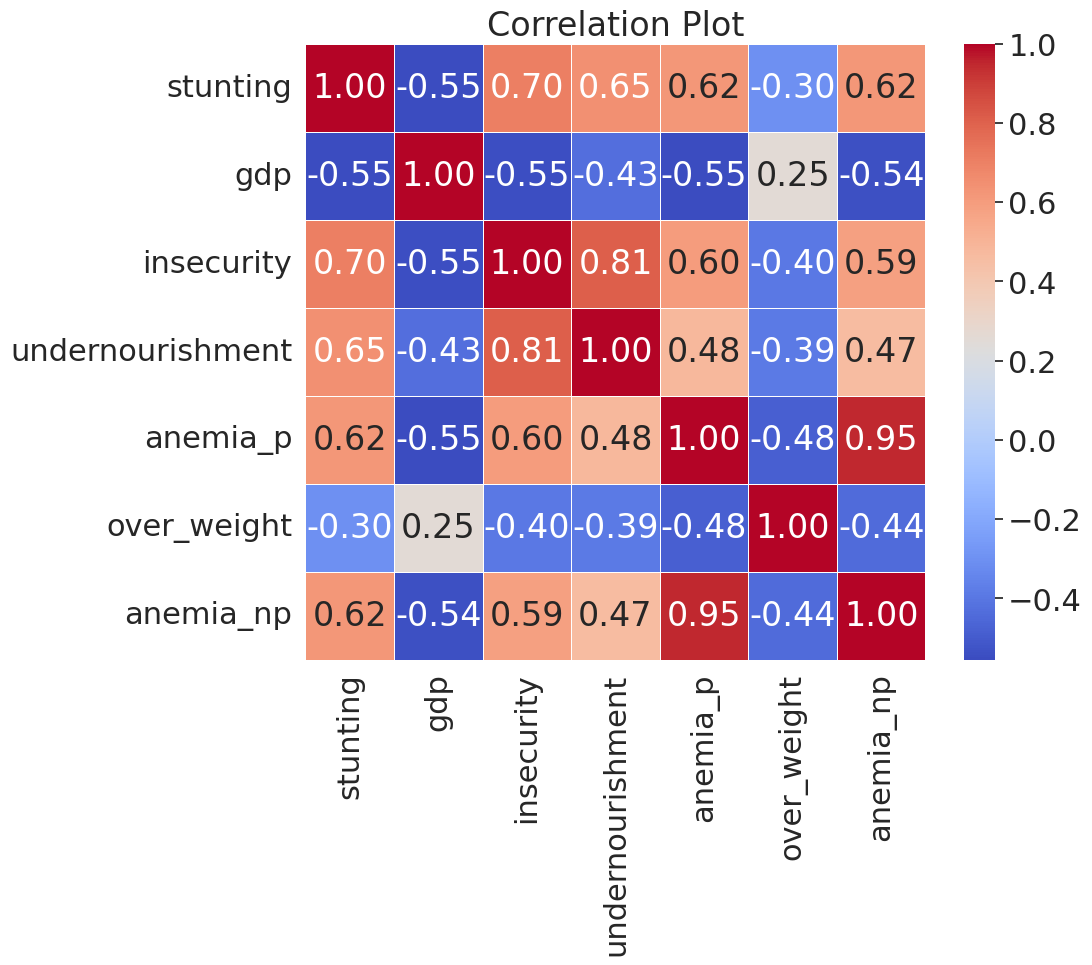

In [81]:
cor = df.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

# Cek Normalitas Data

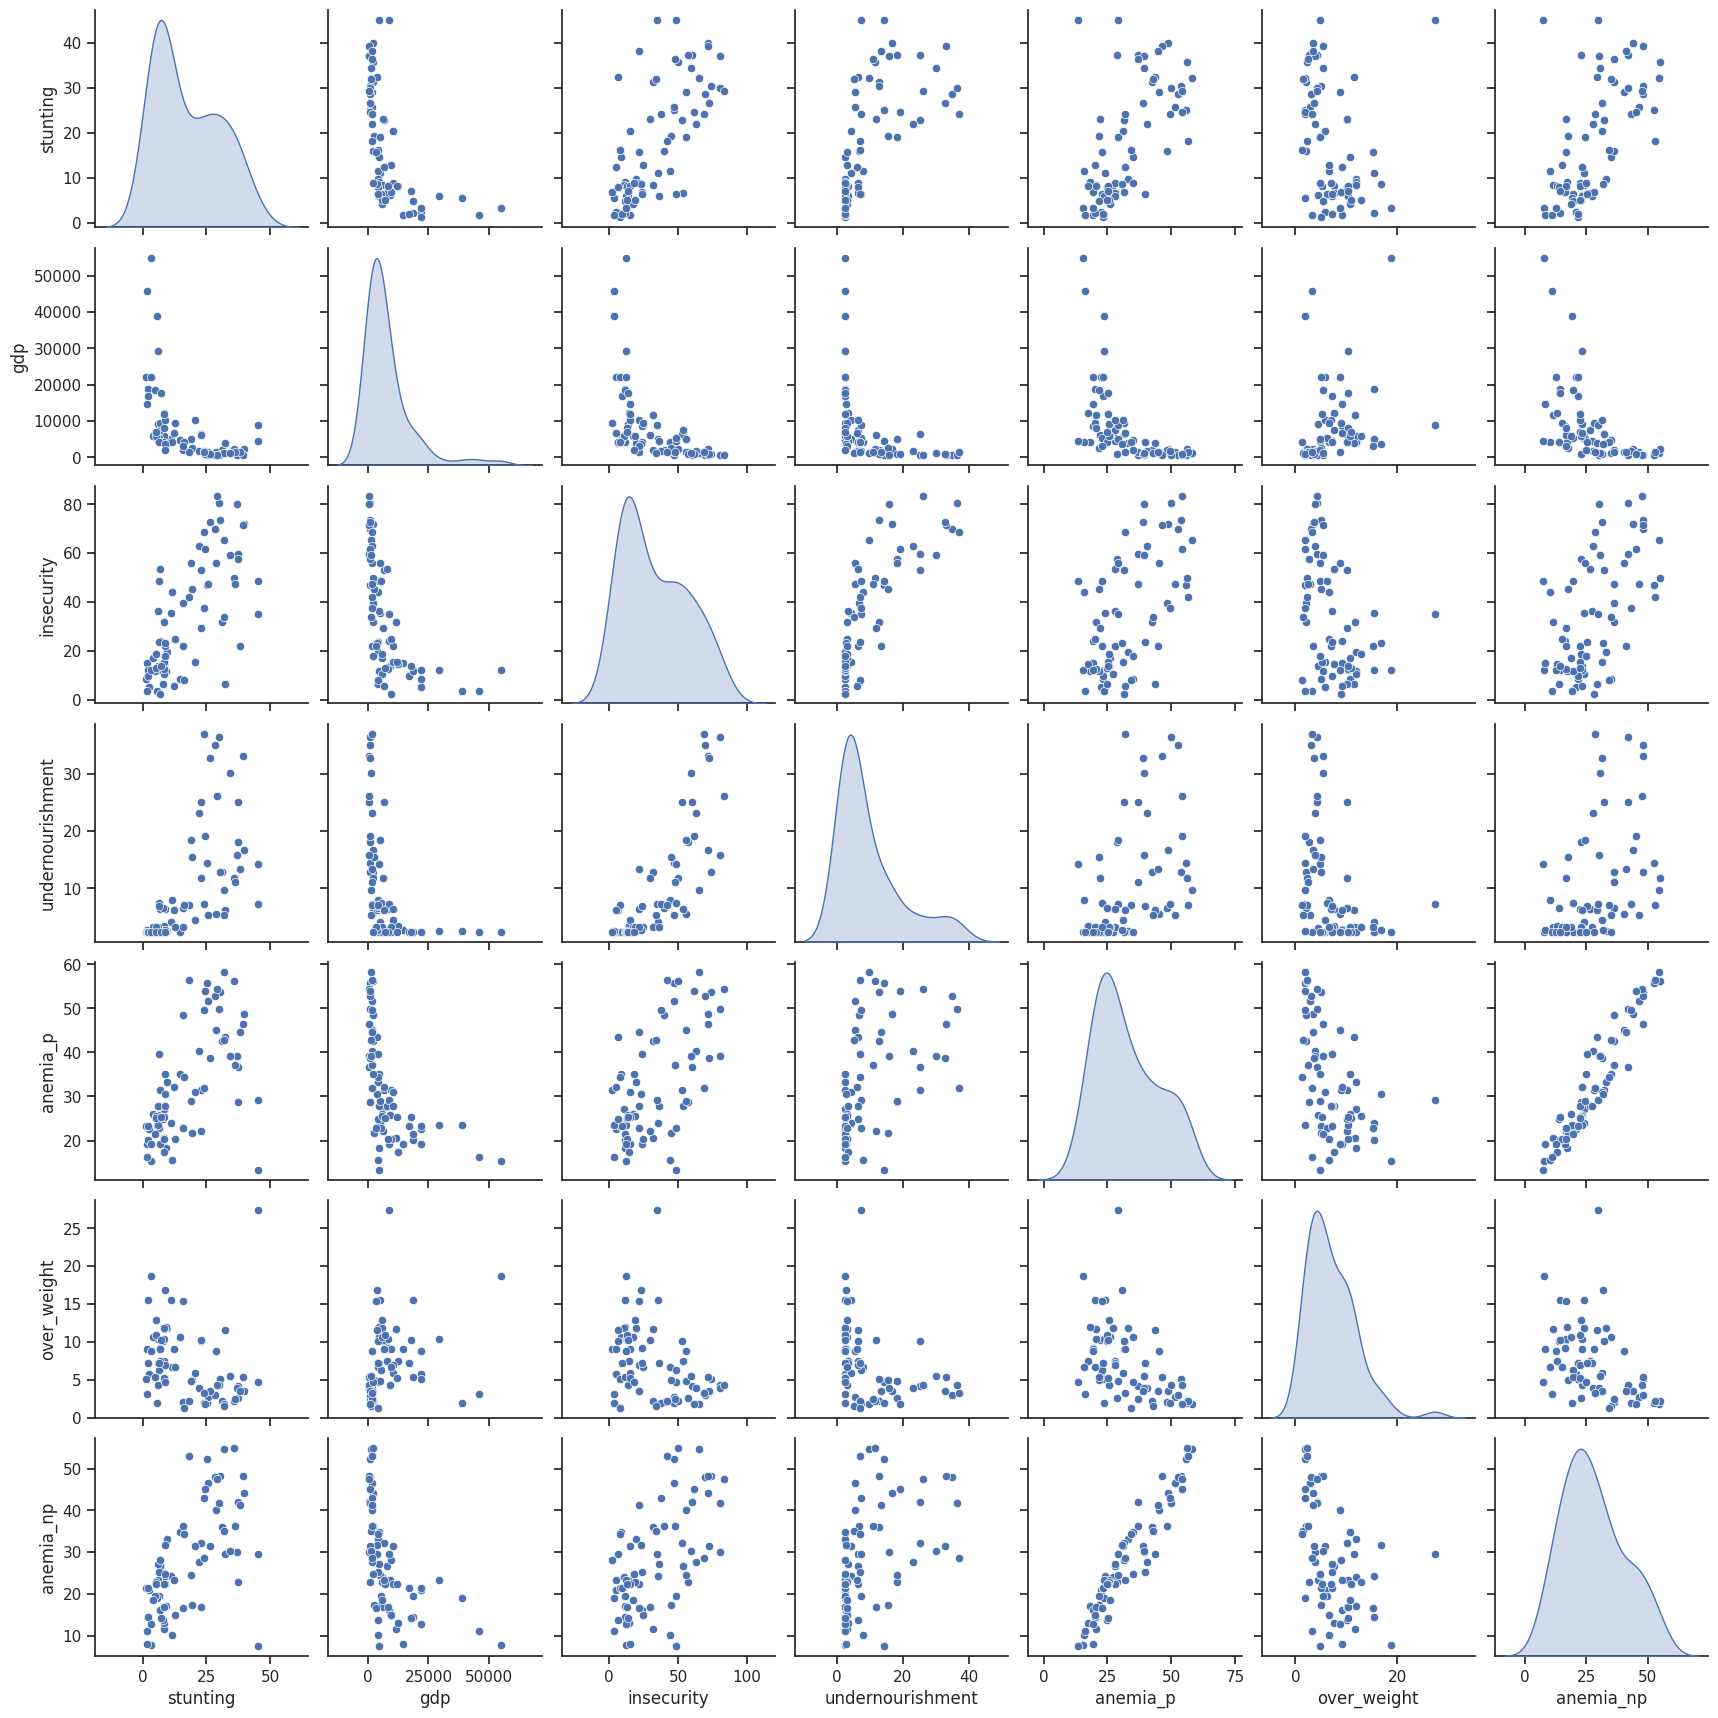

In [82]:
sns.set(style="ticks")
sns.pairplot(df, diag_kind="kde")
plt.show()

In [83]:
df

stunting           gdp  insecurity  undernourishment   anemia_p  \
0   37.228571    503.714135   59.842857         25.085714  36.785714   
1   11.114286   5001.715289   35.485714          4.157143  24.028571   
2    9.728571   3935.400592   19.685714          2.485714  33.214286   
3   39.800000   2161.424052   71.842857         16.714286  48.728571   
4    8.400000  11726.248715   31.842857          3.171429  20.642857   
..        ...           ...         ...               ...        ...   
69  15.700000   3184.045550   21.814286          3.214286  22.857143   
70   7.028571  17640.428099   13.785714          2.400000  25.328571   
71   8.900000   2075.372176   18.014286          2.400000  35.014286   
72  34.428571   1270.154550   59.157143         30.200000  39.157143   
73  24.057143   1551.698096   68.785714         36.942857  31.928571   

    over_weight  anemia_np  
0      4.242857  41.900000  
1     15.485714  24.214286  
2     11.828571  33.071429  
3      3.500000  44.142857  
4     11.671429  11.557143  
..          ...        ...  
69    15.342857  16.700000  
70    10.271429  14.200000  
71     4.771429  24.742857  
72     5.485714  30.342857  
73     3.328571  28.685714  

[74 rows x 7 columns]

In [84]:
alpha = 0.05
for column in df.columns:
    kstest_result = stats.kstest(df[column], 'norm')

    print(f"Variabel: {column}")
    print("Statistik Kolmogorov-Smirnov:", kstest_result.statistic)
    print("P-Value:", kstest_result.pvalue)

    if kstest_result.pvalue < alpha:
        print("Tolak H0: Data tidak terdistribusi normal")
    else:
        print("Terima H0: Data terdistribusi normal")

    print("\n")

Variabel: stunting
Statistik Kolmogorov-Smirnov: 0.9442564131569711
P-Value: 3.307152366670256e-93
Tolak H0: Data tidak terdistribusi normal


Variabel: gdp
Statistik Kolmogorov-Smirnov: 1.0
P-Value: 0.0
Tolak H0: Data tidak terdistribusi normal


Variabel: insecurity
Statistik Kolmogorov-Smirnov: 0.9930531492113757
P-Value: 3.9204853226568994e-160
Tolak H0: Data tidak terdistribusi normal


Variabel: undernourishment
Statistik Kolmogorov-Smirnov: 0.9918024640754038
P-Value: 8.195893582440683e-155
Tolak H0: Data tidak terdistribusi normal


Variabel: anemia_p
Statistik Kolmogorov-Smirnov: 1.0
P-Value: 0.0
Tolak H0: Data tidak terdistribusi normal


Variabel: over_weight
Statistik Kolmogorov-Smirnov: 0.9423301220827047
P-Value: 4.0856406686266274e-92
Tolak H0: Data tidak terdistribusi normal


Variabel: anemia_np
Statistik Kolmogorov-Smirnov: 0.9999999999999645
P-Value: 0.0
Tolak H0: Data tidak terdistribusi normal




In [85]:
columns_to_transform = ['stunting', 'gdp', 'insecurity', 'undernourishment', 'anemia_p', 'over_weight', 'anemia_np']

df_log = pd.DataFrame()

for column_name in columns_to_transform:
    df_log[column_name] = np.log(df[column_name])

df_log

stunting       gdp  insecurity  undernourishment  anemia_p  over_weight  \
0   3.617077  6.222009    4.091722          3.222299  3.605110     1.445237   
1   2.408231  8.517536    3.569130          1.424828  3.179244     2.739918   
2   2.275067  8.277768    2.979893          0.910560  3.502980     2.470518   
3   3.683867  7.678523    4.274481          2.816264  3.886266     1.252763   
4   2.128232  9.369585    3.460813          1.154182  3.027369     2.457144   
..       ...       ...         ...               ...       ...          ...   
69  2.753661  8.065908    3.082565          1.167605  3.129264     2.730650   
70  1.949983  9.777949    2.623633          0.875469  3.231933     2.329366   
71  2.186051  7.637896    2.891165          0.875469  3.555756     1.562646   
72  3.538887  7.146894    4.080197          3.407842  3.667583     1.702147   
73  3.180432  7.347105    4.230996          3.609372  3.463501     1.202543   

    anemia_np  
0    3.735286  
1    3.186943  
2    3.498670  
3    3.787431  
4    2.447304  
..        ...  
69   2.815409  
70   2.653242  
71   3.208537  
72   3.412561  
73   3.356399  

[74 rows x 7 columns]

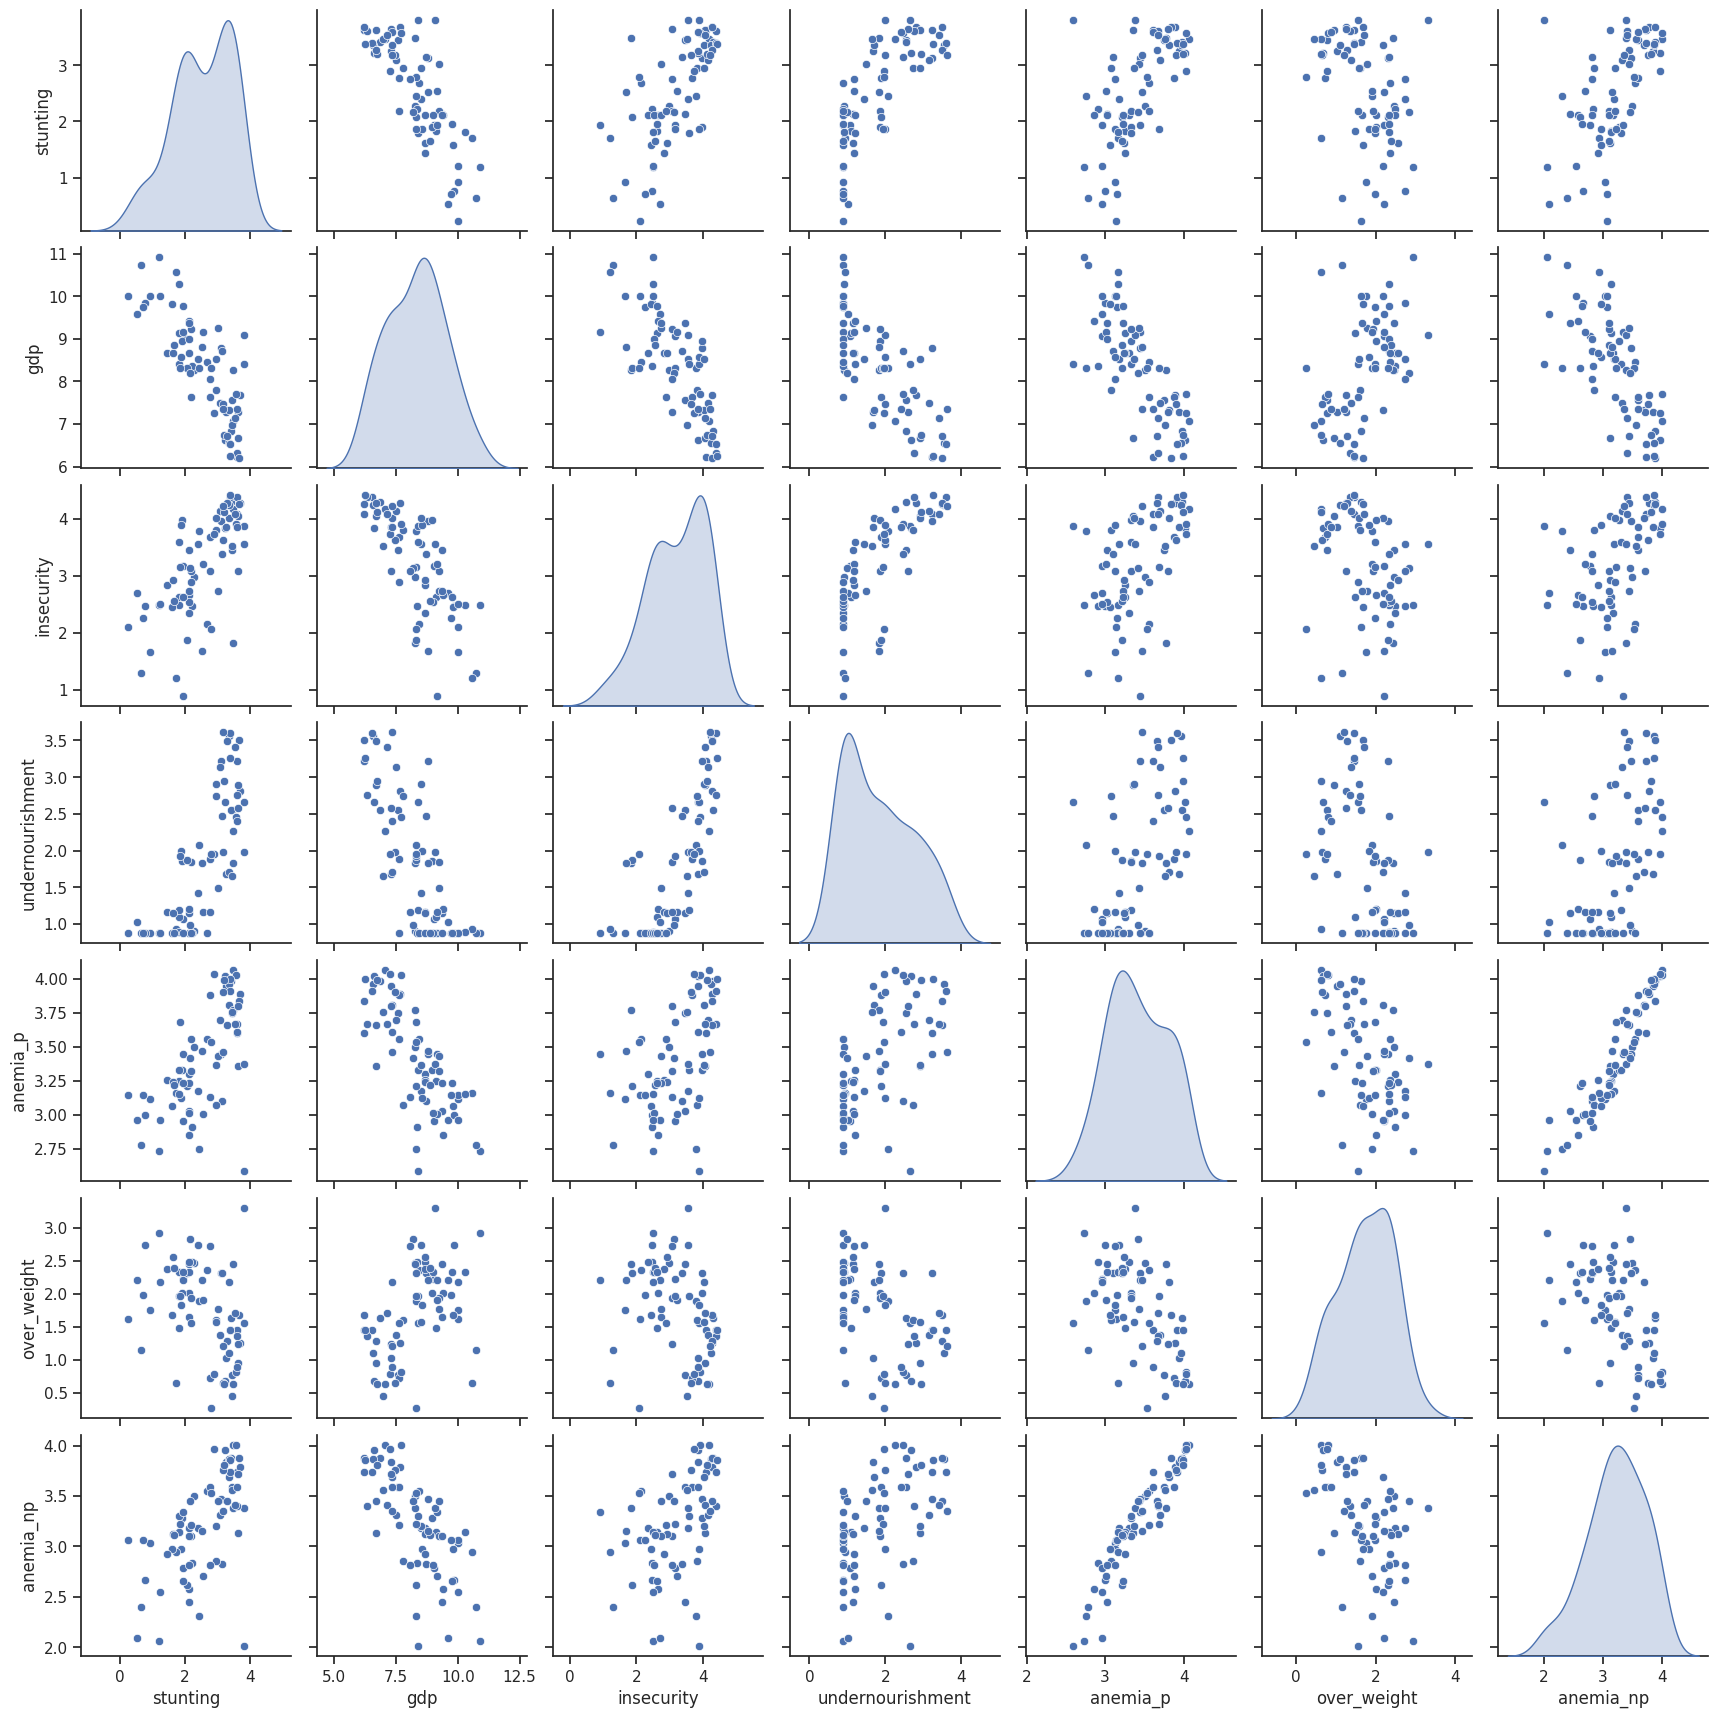

In [86]:
sns.set(style="ticks")
sns.pairplot(df_log, diag_kind="kde")
plt.show()

In [87]:
alpha = 0.05

for column in df_log.columns:
    kstest_result = stats.kstest(df_log[column], 'norm')

    print(f"Variabel: {column}")
    print("Statistik Kolmogorov-Smirnov:", kstest_result.statistic)
    print("P-Value:", kstest_result.pvalue)

    if kstest_result.pvalue < alpha:
        print("Tolak H0: Data tidak terdistribusi normal")
    else:
        print("Terima H0: Data terdistribusi normal")

    print("\n")

Variabel: stunting
Statistik Kolmogorov-Smirnov: 0.8223747278375872
P-Value: 1.484234118004663e-55
Tolak H0: Data tidak terdistribusi normal


Variabel: gdp
Statistik Kolmogorov-Smirnov: 0.9999999997162642
P-Value: 0.0
Tolak H0: Data tidak terdistribusi normal


Variabel: insecurity
Statistik Kolmogorov-Smirnov: 0.9117724890642397
P-Value: 1.8945468966910894e-78
Tolak H0: Data tidak terdistribusi normal


Variabel: undernourishment
Statistik Kolmogorov-Smirnov: 0.8093405433351144
P-Value: 3.9155541078786127e-53
Tolak H0: Data tidak terdistribusi normal


Variabel: anemia_p
Statistik Kolmogorov-Smirnov: 0.9952148639696525
P-Value: 4.1039997729008e-172
Tolak H0: Data tidak terdistribusi normal


Variabel: over_weight
Statistik Kolmogorov-Smirnov: 0.7075457032629804
P-Value: 8.105296327549537e-38
Tolak H0: Data tidak terdistribusi normal


Variabel: anemia_np
Statistik Kolmogorov-Smirnov: 0.9779424981826991
P-Value: 5.299049153159992e-123
Tolak H0: Data tidak terdistribusi normal




In [88]:
alpha = 0.05

for column in df_log.columns:
    jb_value, jb_pvalue = stats.jarque_bera(df_log[column])

    print(f"Variabel: {column}")
    print("Statistik Jarque-Bera:", jb_value)
    print("P-Value:", jb_pvalue)

    if jb_pvalue < alpha:
        print("Tolak H0: Data tidak terdistribusi normal")
    else:
        print("Terima H0: Data terdistribusi normal")

    print("\n")

Variabel: stunting
Statistik Jarque-Bera: 4.486048671677654
P-Value: 0.10613702448572995
Terima H0: Data terdistribusi normal


Variabel: gdp
Statistik Jarque-Bera: 1.7788938287711509
P-Value: 0.4108829433638115
Terima H0: Data terdistribusi normal


Variabel: insecurity
Statistik Jarque-Bera: 4.5332291888797975
P-Value: 0.10366252640957144
Terima H0: Data terdistribusi normal


Variabel: undernourishment
Statistik Jarque-Bera: 6.499377943194896
P-Value: 0.03878626958732117
Tolak H0: Data tidak terdistribusi normal


Variabel: anemia_p
Statistik Jarque-Bera: 2.8382093789423095
P-Value: 0.2419305229069267
Terima H0: Data terdistribusi normal


Variabel: over_weight
Statistik Jarque-Bera: 2.0643131588391355
P-Value: 0.3562378762990696
Terima H0: Data terdistribusi normal


Variabel: anemia_np
Statistik Jarque-Bera: 2.870333389635714
P-Value: 0.238075674725545
Terima H0: Data terdistribusi normal




In [89]:
df_log

stunting       gdp  insecurity  undernourishment  anemia_p  over_weight  \
0   3.617077  6.222009    4.091722          3.222299  3.605110     1.445237   
1   2.408231  8.517536    3.569130          1.424828  3.179244     2.739918   
2   2.275067  8.277768    2.979893          0.910560  3.502980     2.470518   
3   3.683867  7.678523    4.274481          2.816264  3.886266     1.252763   
4   2.128232  9.369585    3.460813          1.154182  3.027369     2.457144   
..       ...       ...         ...               ...       ...          ...   
69  2.753661  8.065908    3.082565          1.167605  3.129264     2.730650   
70  1.949983  9.777949    2.623633          0.875469  3.231933     2.329366   
71  2.186051  7.637896    2.891165          0.875469  3.555756     1.562646   
72  3.538887  7.146894    4.080197          3.407842  3.667583     1.702147   
73  3.180432  7.347105    4.230996          3.609372  3.463501     1.202543   

    anemia_np  
0    3.735286  
1    3.186943  
2    3.498670  
3    3.787431  
4    2.447304  
..        ...  
69   2.815409  
70   2.653242  
71   3.208537  
72   3.412561  
73   3.356399  

[74 rows x 7 columns]

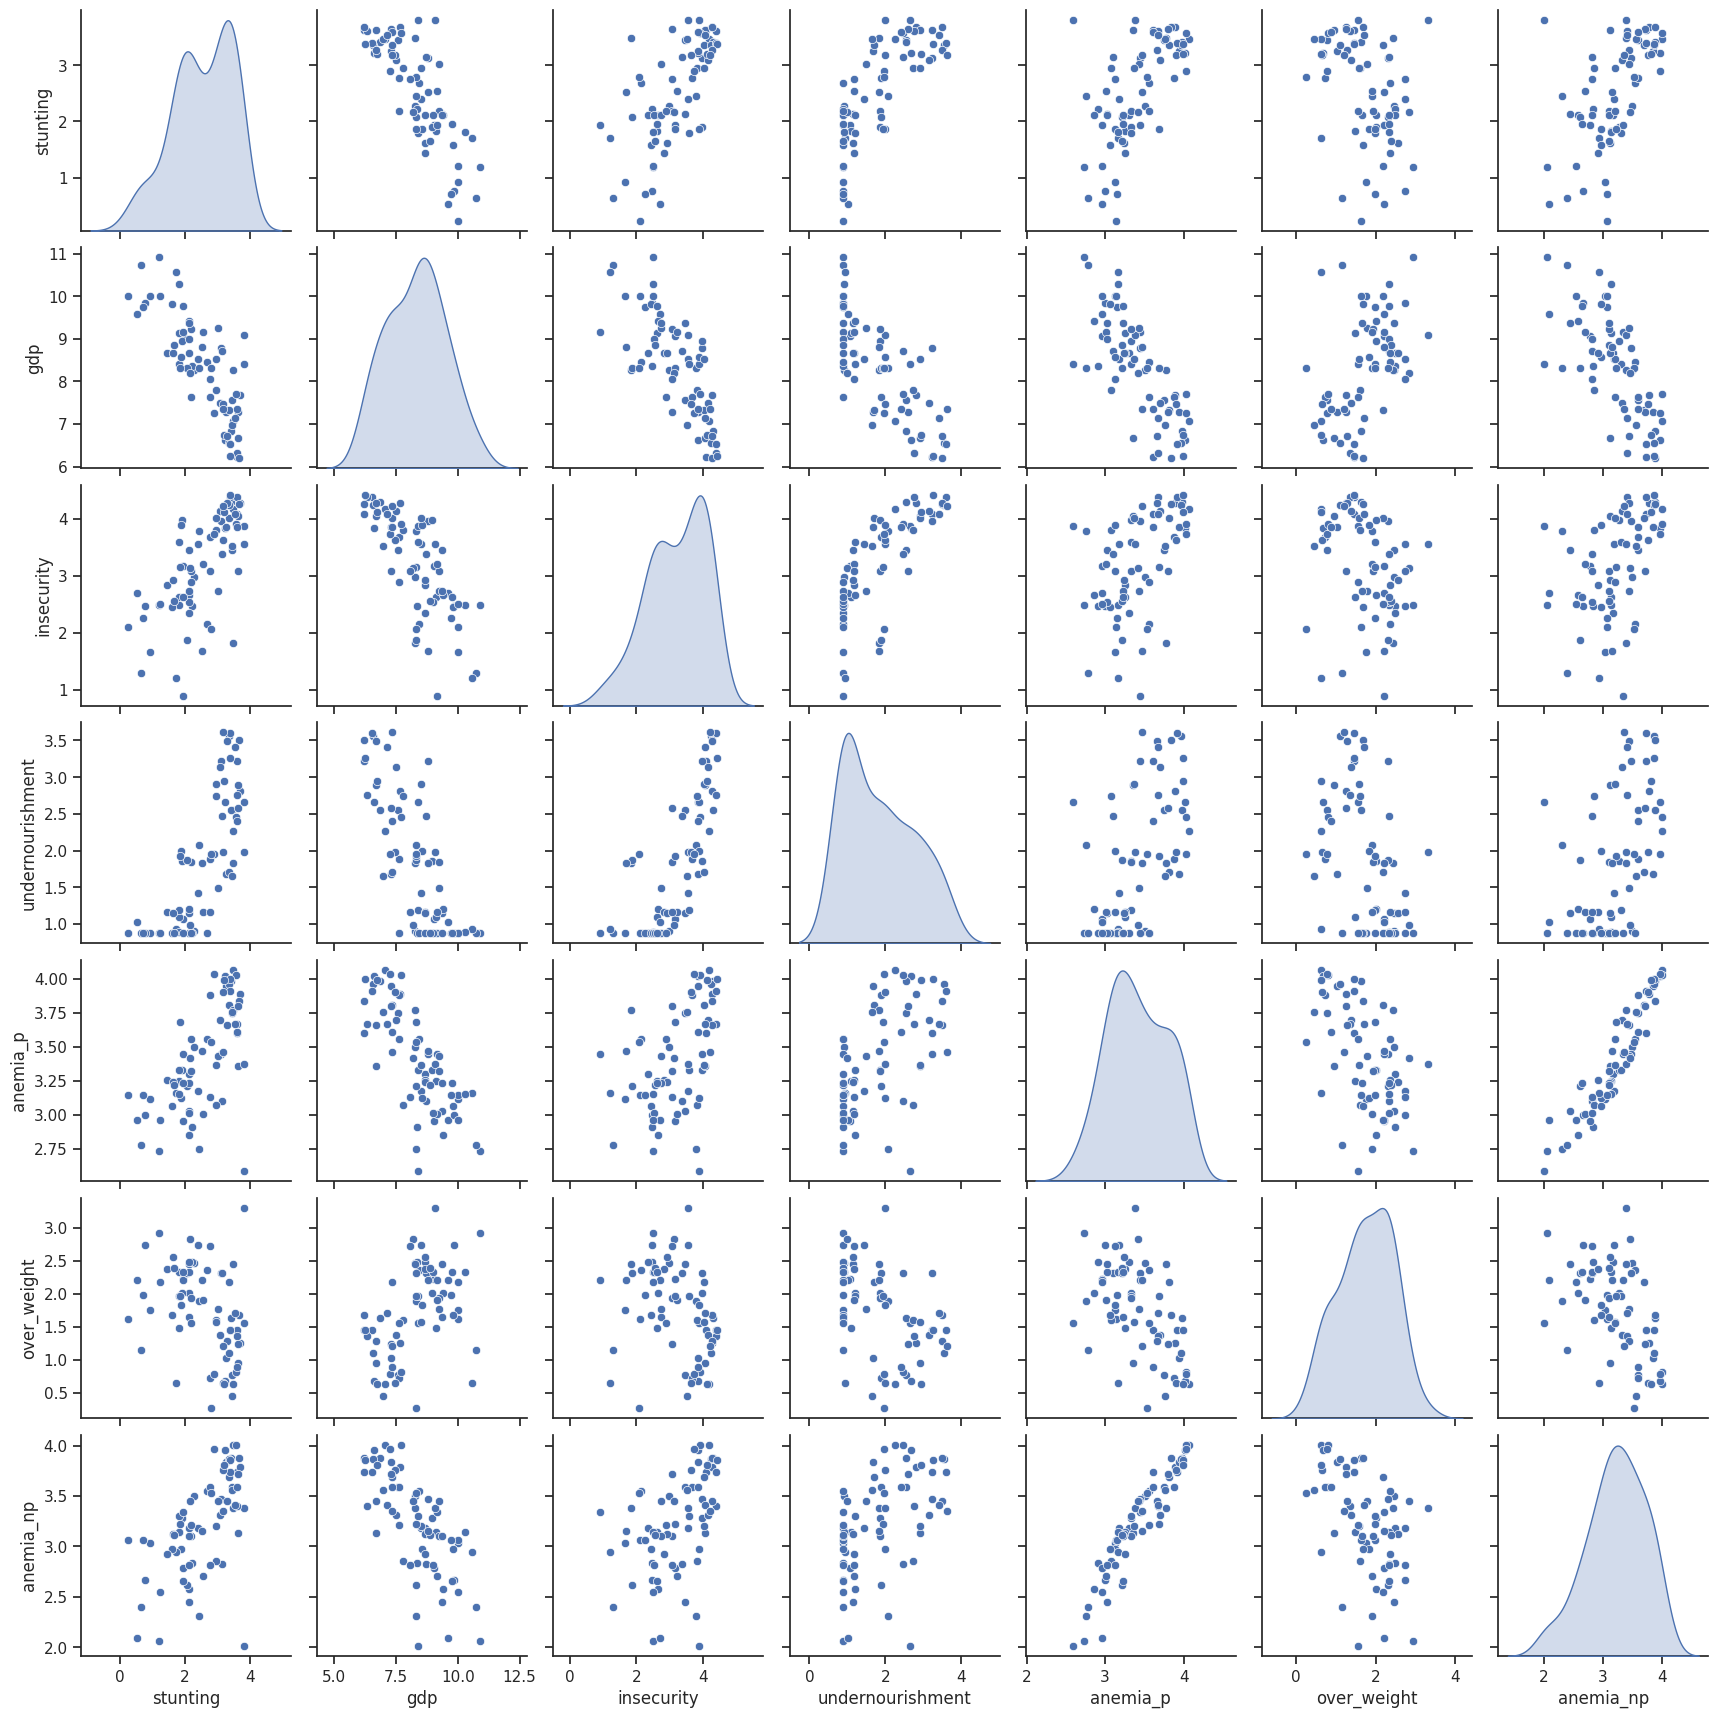

In [90]:
sns.set(style="ticks")
sns.pairplot(df_log, diag_kind="kde")
plt.show()

In [91]:
X = df_log[['gdp', 'insecurity', 'undernourishment', 'anemia_p', 'over_weight', 'anemia_np']]
X = sm.add_constant(X)  # Menambahkan konstanta untuk intercept
y = df_log['stunting']
model = sm.OLS(y, X).fit()

model

# Uji asumsi-asumsi regresi

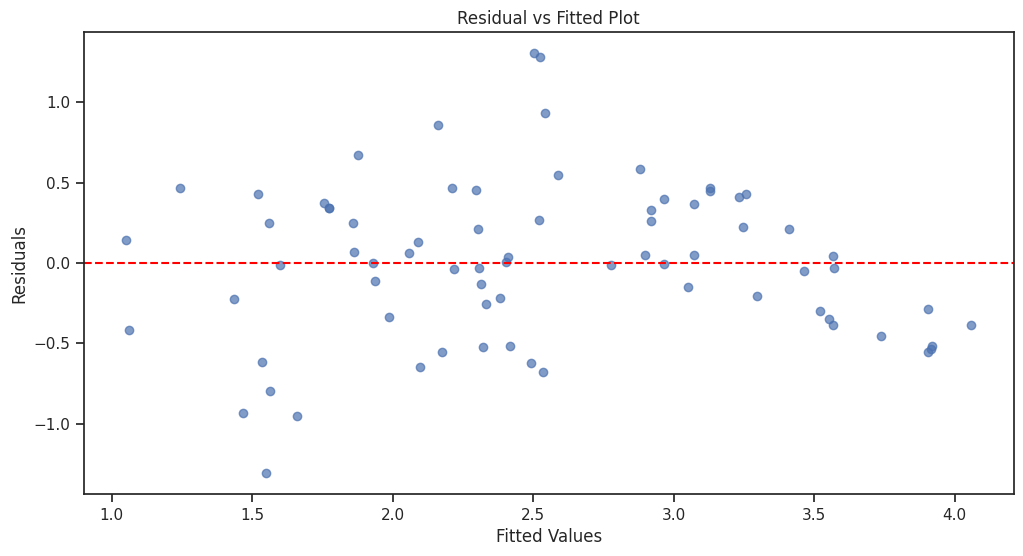

In [92]:
plt.figure(figsize=(12, 6))
plt.scatter(model.fittedvalues, model.resid, alpha=0.7)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted Plot")
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [93]:
bg_test = sms.diagnostic.acorr_breusch_godfrey(model, nlags=1, store=False)
print(bg_test)
print("\n")

print("2. Asumsi Ketergantungan (Autocorrelation of Residuals)")
if bg_test[1] < 0.05:
    print("Asumsi Tidak Terpenuhi")
else:
    print("Asumsi Terpenuhi")

(2.675594754130128, 0.10189725219134277, 2.475860165448977, 0.1203880816903994)


2. Asumsi Ketergantungan (Autocorrelation of Residuals)
Asumsi Terpenuhi


In [94]:
def lzip(names, vals):
    """
    Helper function for displaying the results of various statsmodels tests.
    """
    out = []
    for name, val in zip(names, vals):
        out.append([name, val])
    return out

bp_test = sms.het_breuschpagan(model.resid, X)
names = ['Lagrange Multiplier Statistic', 'LM-Test', 'F-Test']

print(lzip(names, bp_test))
print("\n")

print("3. Asumsi Homoskedastisitas (Breusch-Pagan Test)")

if bp_test[1] < 0.05:
    print("Asumsi Tidak Terpenuhi")
else:
    print("Asumsi Terpenuhi")

[['Lagrange Multiplier Statistic', 6.4473941703955955], ['LM-Test', 0.3749800995374938], ['F-Test', 1.065775341827981]]


3. Asumsi Homoskedastisitas (Breusch-Pagan Test)
Asumsi Terpenuhi


In [95]:
dw_test = sms.durbin_watson(model.resid)

print(dw_test)
print("\n")

print("4. Asumsi Independensi (Durbin-Watson Statistic)")

if 1.5 < dw_test < 2.5:
    print("Asumsi Terpenuhi")
else:
    print("Asumsi Tidak Terpenuhi")

2.3445534199050706


4. Asumsi Independensi (Durbin-Watson Statistic)
Asumsi Terpenuhi


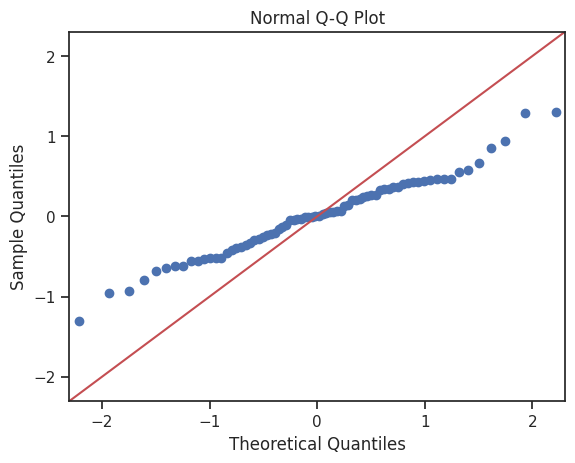

In [96]:
sm.qqplot(model.resid, line='45')
plt.title("Normal Q-Q Plot")
plt.show()

In [97]:
gq_test = sms.het_goldfeldquandt(model.resid, X)

print(gq_test)
print("\n")

print("6. Asumsi Homoskedastisitas (Goldfeld-Quandt Test)")

if gq_test[1] < 0.05:
    print("Asumsi Tidak Terpenuhi")
else:
    print("Asumsi Terpenuhi")

(0.8995666095451453, 0.613092847954257, 'increasing')


6. Asumsi Homoskedastisitas (Goldfeld-Quandt Test)
Asumsi Terpenuhi


In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)
print("\n")


print("7. Multikolinearitas (VIF)")

if all(vif["VIF"] < 10):
    print("Asumsi Terpenuhi")
else:
    print("Asumsi Tidak Terpenuhi")

           Features         VIF
0             const  999.746360
1               gdp    4.809813
2        insecurity    2.988955
3  undernourishment    3.235856
4          anemia_p   10.303933
5       over_weight    1.533115
6         anemia_np    8.226266


7. Multikolinearitas (VIF)
Asumsi Tidak Terpenuhi


# Pengujian Model

### Koefisien Regresi:

In [99]:
# Melihat ringkasan model
print(model.summary())

# Melihat koefisien regresi
print(model.params)

                            OLS Regression Results                            
Dep. Variable:               stunting   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     27.28
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           3.26e-16
Time:                        00:15:34   Log-Likelihood:                -52.132
No. Observations:                  74   AIC:                             118.3
Df Residuals:                      67   BIC:                             134.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.5060      1.891  

### Uji Signifikansi Koefisien

In [100]:

variables_to_test = ['gdp', 'insecurity', 'undernourishment', 'anemia_p', 'over_weight', 'anemia_np']


for var in variables_to_test:
    hypothesis = f'{var} = 0'
    t_test = model.t_test(hypothesis)
    print(f"Uji T untuk variabel {var}:")
    print(t_test)

Uji T untuk variabel gdp:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.3163      0.112     -2.833      0.006      -0.539      -0.093
Uji T untuk variabel insecurity:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0398      0.119      0.334      0.739      -0.198       0.277
Uji T untuk variabel undernourishment:
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.3883      0.120 

### Uji Kesesuaian Model:

In [101]:
f_statistic = (model.rsquared / (1 - model.rsquared)) * (model.df_model / model.df_resid)
p_value = 1 - f.cdf(f_statistic, model.df_model, model.df_resid)
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

F-statistic: 0.2187534032024519
P-value: 0.9695099908886986


### Evaluasi Akurasi Model:

In [102]:
r_squared = model.rsquared
print(f'R-squared: {r_squared}')

mae = np.mean(np.abs(model.resid))
print(f'MAE: {mae}')
mse = np.mean(model.resid**2)
print(f'MSE: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

R-squared: 0.7095342199299621
MAE: 0.3827510089701664
MSE: 0.2395690884495778
RMSE: 0.4894579537095886


In [103]:
df=combined_df.copy()

In [104]:
df.isnull().sum()

GeoAreaCode         0
GeoAreaName         0
stunting            0
gdp                 0
insecurity          0
undernourishment    0
anemia_p            0
over_weight         0
anemia_np           0
dtype: int64

In [105]:
df

GeoAreaCode  GeoAreaName   stunting           gdp  insecurity  \
0             4  Afghanistan  37.228571    503.714135   59.842857   
1             8      Albania  11.114286   5001.715289   35.485714   
2            12      Algeria   9.728571   3935.400592   19.685714   
3            24       Angola  39.800000   2161.424052   71.842857   
4            32    Argentina   8.400000  11726.248715   31.842857   
..          ...          ...        ...           ...         ...   
69          804      Ukraine  15.700000   3184.045550   21.814286   
70          858      Uruguay   7.028571  17640.428099   13.785714   
71          860   Uzbekistan   8.900000   2075.372176   18.014286   
72          894       Zambia  34.428571   1270.154550   59.157143   
73          716     Zimbabwe  24.057143   1551.698096   68.785714   

    undernourishment   anemia_p  over_weight  anemia_np  
0          25.085714  36.785714     4.242857  41.900000  
1           4.157143  24.028571    15.485714  24.214286  
2           2.485714  33.214286    11.828571  33.071429  
3          16.714286  48.728571     3.500000  44.142857  
4           3.171429  20.642857    11.671429  11.557143  
..               ...        ...          ...        ...  
69          3.214286  22.857143    15.342857  16.700000  
70          2.400000  25.328571    10.271429  14.200000  
71          2.400000  35.014286     4.771429  24.742857  
72         30.200000  39.157143     5.485714  30.342857  
73         36.942857  31.928571     3.328571  28.685714  

[74 rows x 9 columns]

In [106]:
df = df.drop(columns=['GeoAreaCode'])

In [107]:
from sklearn.preprocessing import MinMaxScaler
df2 = df.copy()

numeric_columns = df2.select_dtypes(include='number').columns
numeric_columns

print(df2[numeric_columns])

     stunting           gdp  insecurity  undernourishment   anemia_p  \
0   37.228571    503.714135   59.842857         25.085714  36.785714   
1   11.114286   5001.715289   35.485714          4.157143  24.028571   
2    9.728571   3935.400592   19.685714          2.485714  33.214286   
3   39.800000   2161.424052   71.842857         16.714286  48.728571   
4    8.400000  11726.248715   31.842857          3.171429  20.642857   
..        ...           ...         ...               ...        ...   
69  15.700000   3184.045550   21.814286          3.214286  22.857143   
70   7.028571  17640.428099   13.785714          2.400000  25.328571   
71   8.900000   2075.372176   18.014286          2.400000  35.014286   
72  34.428571   1270.154550   59.157143         30.200000  39.157143   
73  24.057143   1551.698096   68.785714         36.942857  31.928571   

    over_weight  anemia_np  
0      4.242857  41.900000  
1     15.485714  24.214286  
2     11.828571  33.071429  
3      3.500000  44

In [108]:
scaler = MinMaxScaler()

df2[numeric_columns] = scaler.fit_transform(df2.iloc[:, 1:])

print(df)

    GeoAreaName   stunting           gdp  insecurity  undernourishment  \
0   Afghanistan  37.228571    503.714135   59.842857         25.085714   
1       Albania  11.114286   5001.715289   35.485714          4.157143   
2       Algeria   9.728571   3935.400592   19.685714          2.485714   
3        Angola  39.800000   2161.424052   71.842857         16.714286   
4     Argentina   8.400000  11726.248715   31.842857          3.171429   
..          ...        ...           ...         ...               ...   
69      Ukraine  15.700000   3184.045550   21.814286          3.214286   
70      Uruguay   7.028571  17640.428099   13.785714          2.400000   
71   Uzbekistan   8.900000   2075.372176   18.014286          2.400000   
72       Zambia  34.428571   1270.154550   59.157143         30.200000   
73     Zimbabwe  24.057143   1551.698096   68.785714         36.942857   

     anemia_p  over_weight  anemia_np  
0   36.785714     4.242857  41.900000  
1   24.028571    15.485714  24.

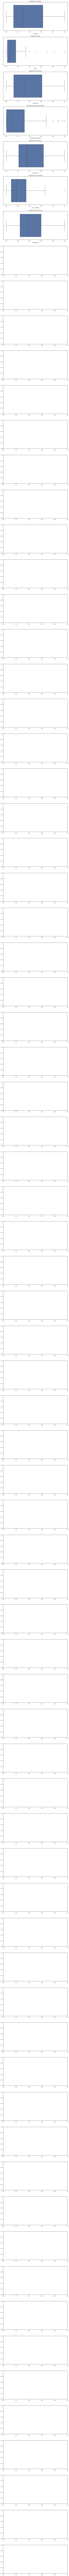

In [109]:
num_plots = len(df2.iloc[:, 1:])

fig, axes = plt.subplots(nrows=num_plots, figsize=(10, num_plots * 5))
for i, column in enumerate(df2.iloc[:, 1:]):
    sns.boxplot(x=column, data=df2, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

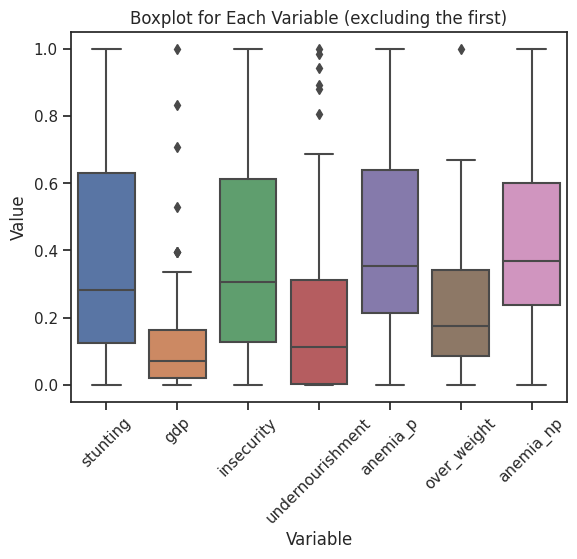

In [110]:
fig, ax = plt.subplots()
sns.boxplot(data=df2.iloc[:, 1:], ax=ax)
ax.set_title('Boxplot for Each Variable (excluding the first)')
ax.set_xlabel('Variable')
ax.set_ylabel('Value')

plt.xticks(rotation=45)
plt.show()


In [111]:
for column in df2.iloc[:, 1:]:
    df2[column] = winsorize(df2[column], limits=[0.05, 0.05])

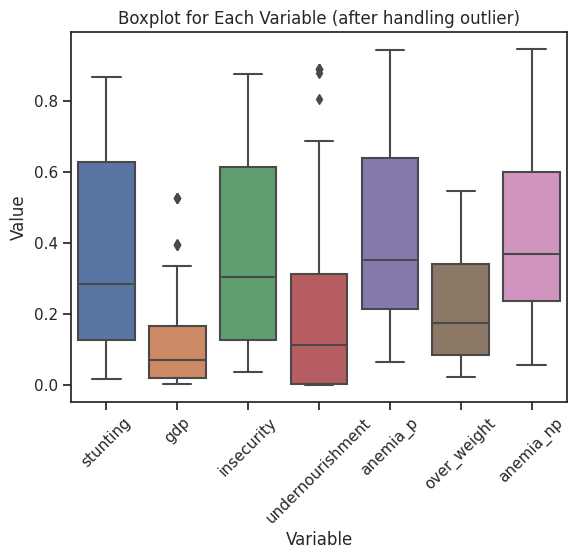

In [112]:
fig, ax = plt.subplots()
sns.boxplot(data=df2.iloc[:, 1:], ax=ax)
ax.set_title('Boxplot for Each Variable (after handling outlier)')
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
plt.xticks(rotation=45)

plt.show()

In [113]:
variable_to_transform = ['gdp', 'undernourishment']


df2[variable_to_transform] = np.log1p(df2[variable_to_transform])

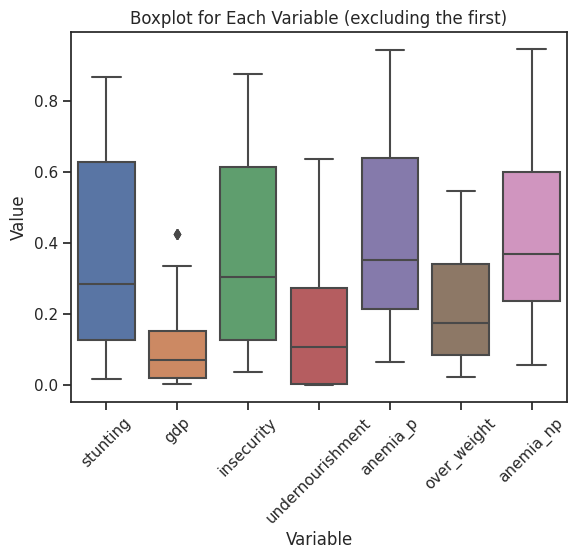

In [114]:
fig, ax = plt.subplots()
sns.boxplot(data=df2.iloc[:, 1:], ax=ax)
ax.set_title('Boxplot for Each Variable (excluding the first)')
ax.set_xlabel('Variable')
ax.set_ylabel('Value')
plt.xticks(rotation=45)
plt.show()

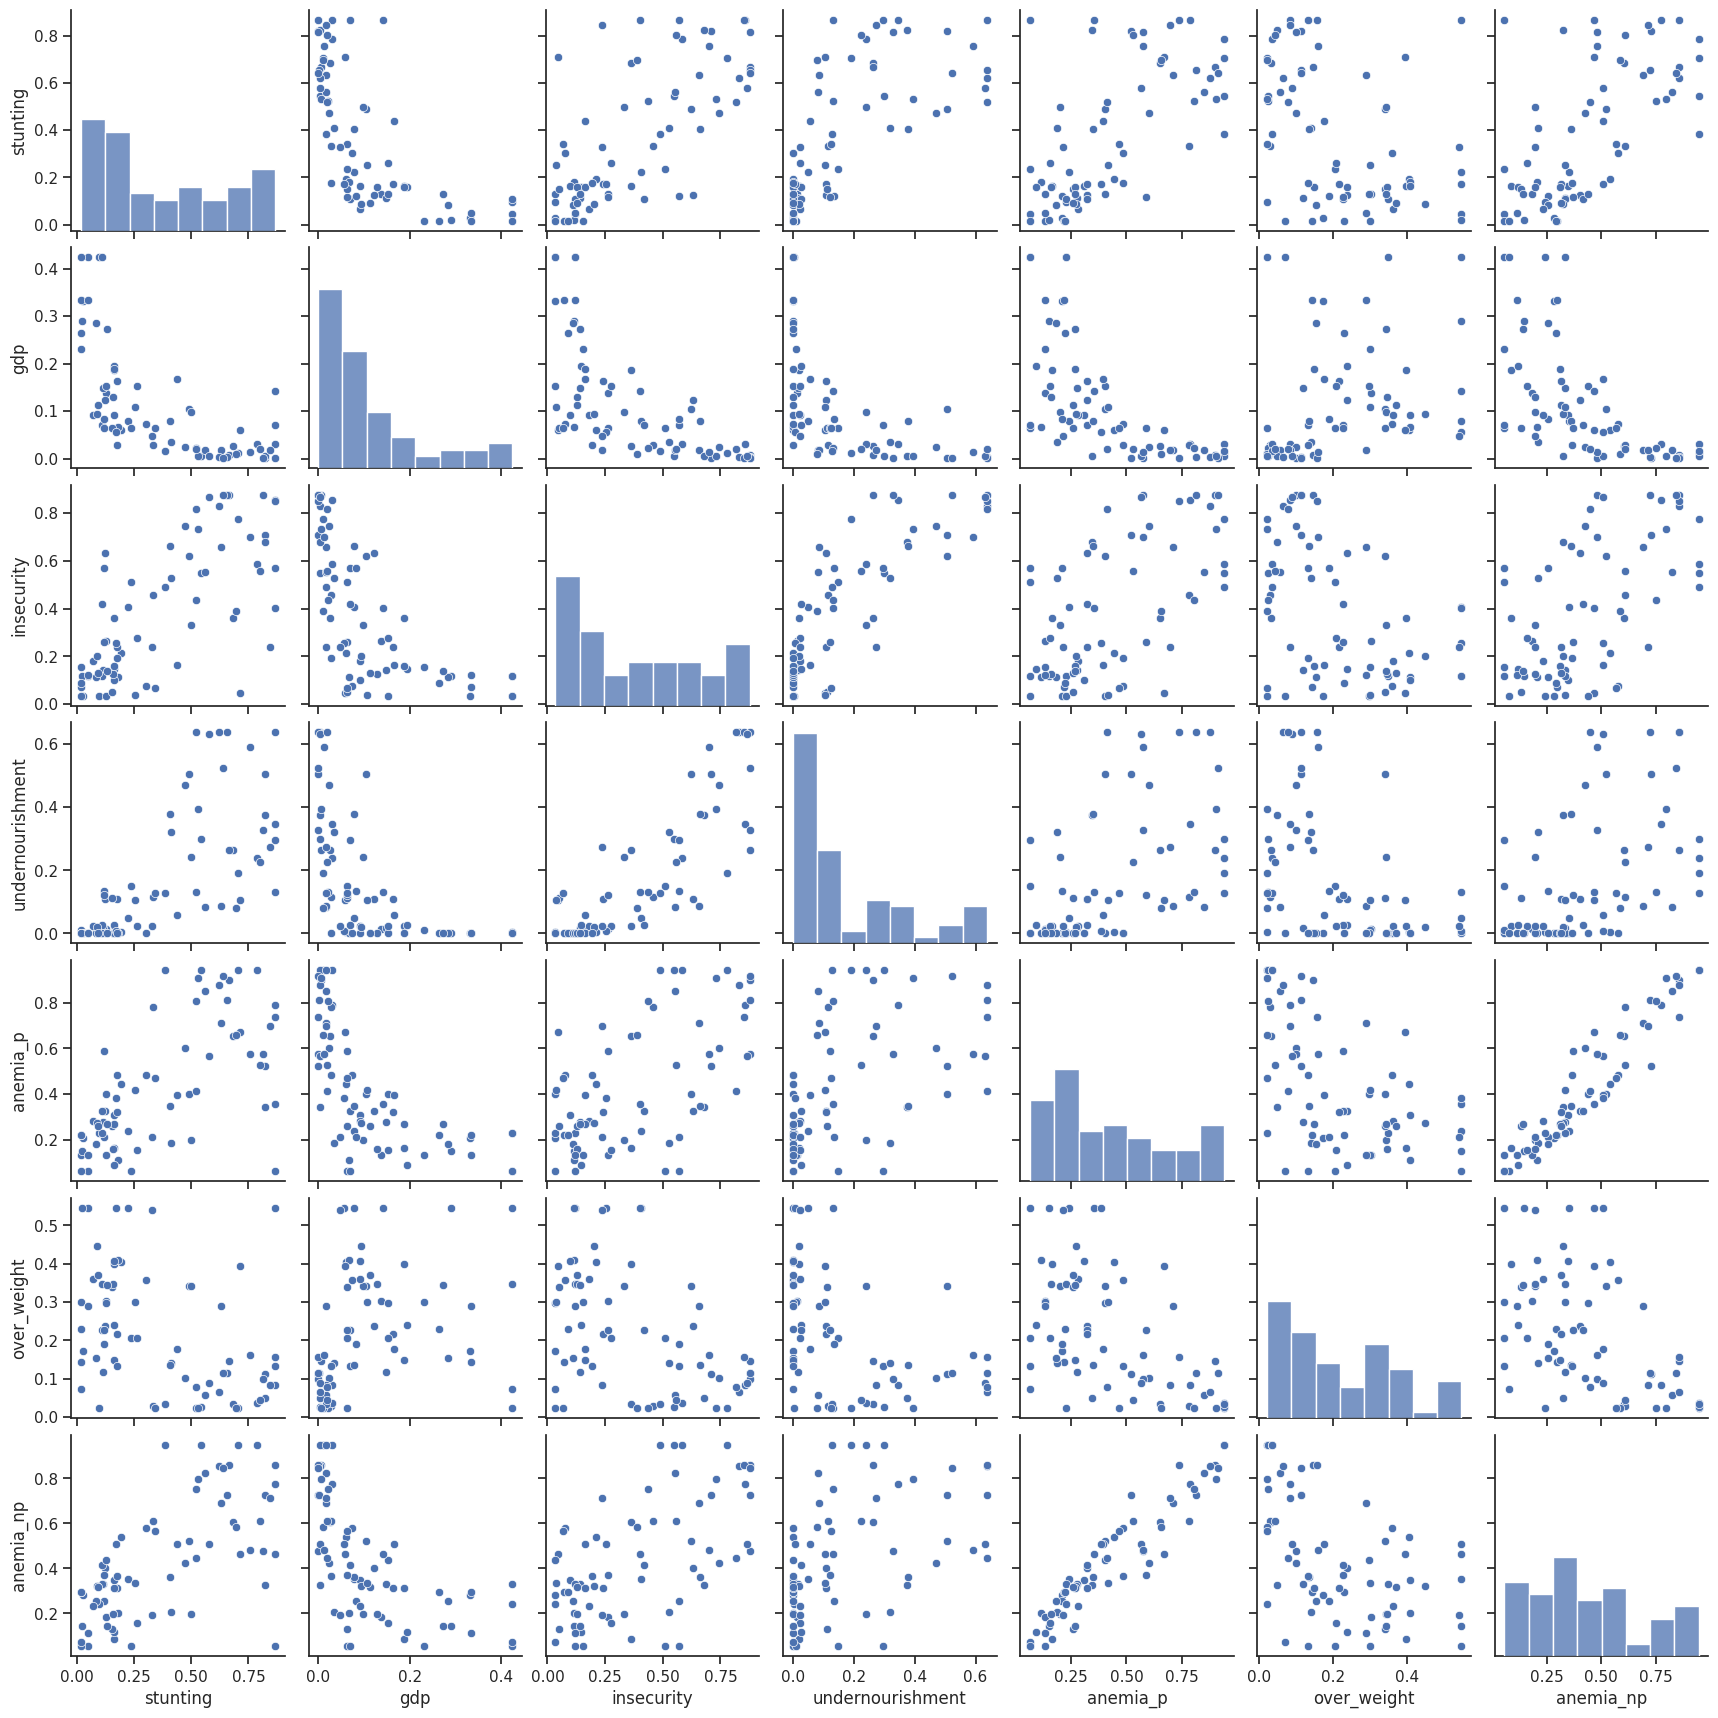

In [115]:
sns.pairplot(df2)
plt.show()

In [116]:
attrribute = df2.iloc[:, 1:].values

In [117]:
elbow = []
k = range(1,10)

for i in k:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(attrribute)
  elbow.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

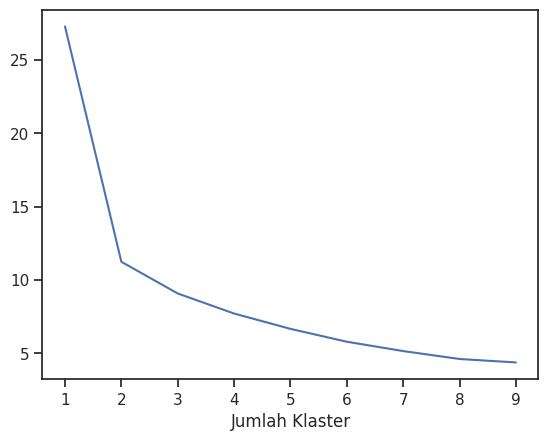

In [118]:
plt.plot(range(1,10), elbow)
plt.xlabel('Jumlah Klaster')
plt.xticks(range(1, 10))

plt.show()

###CLUSTERING MEAN

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


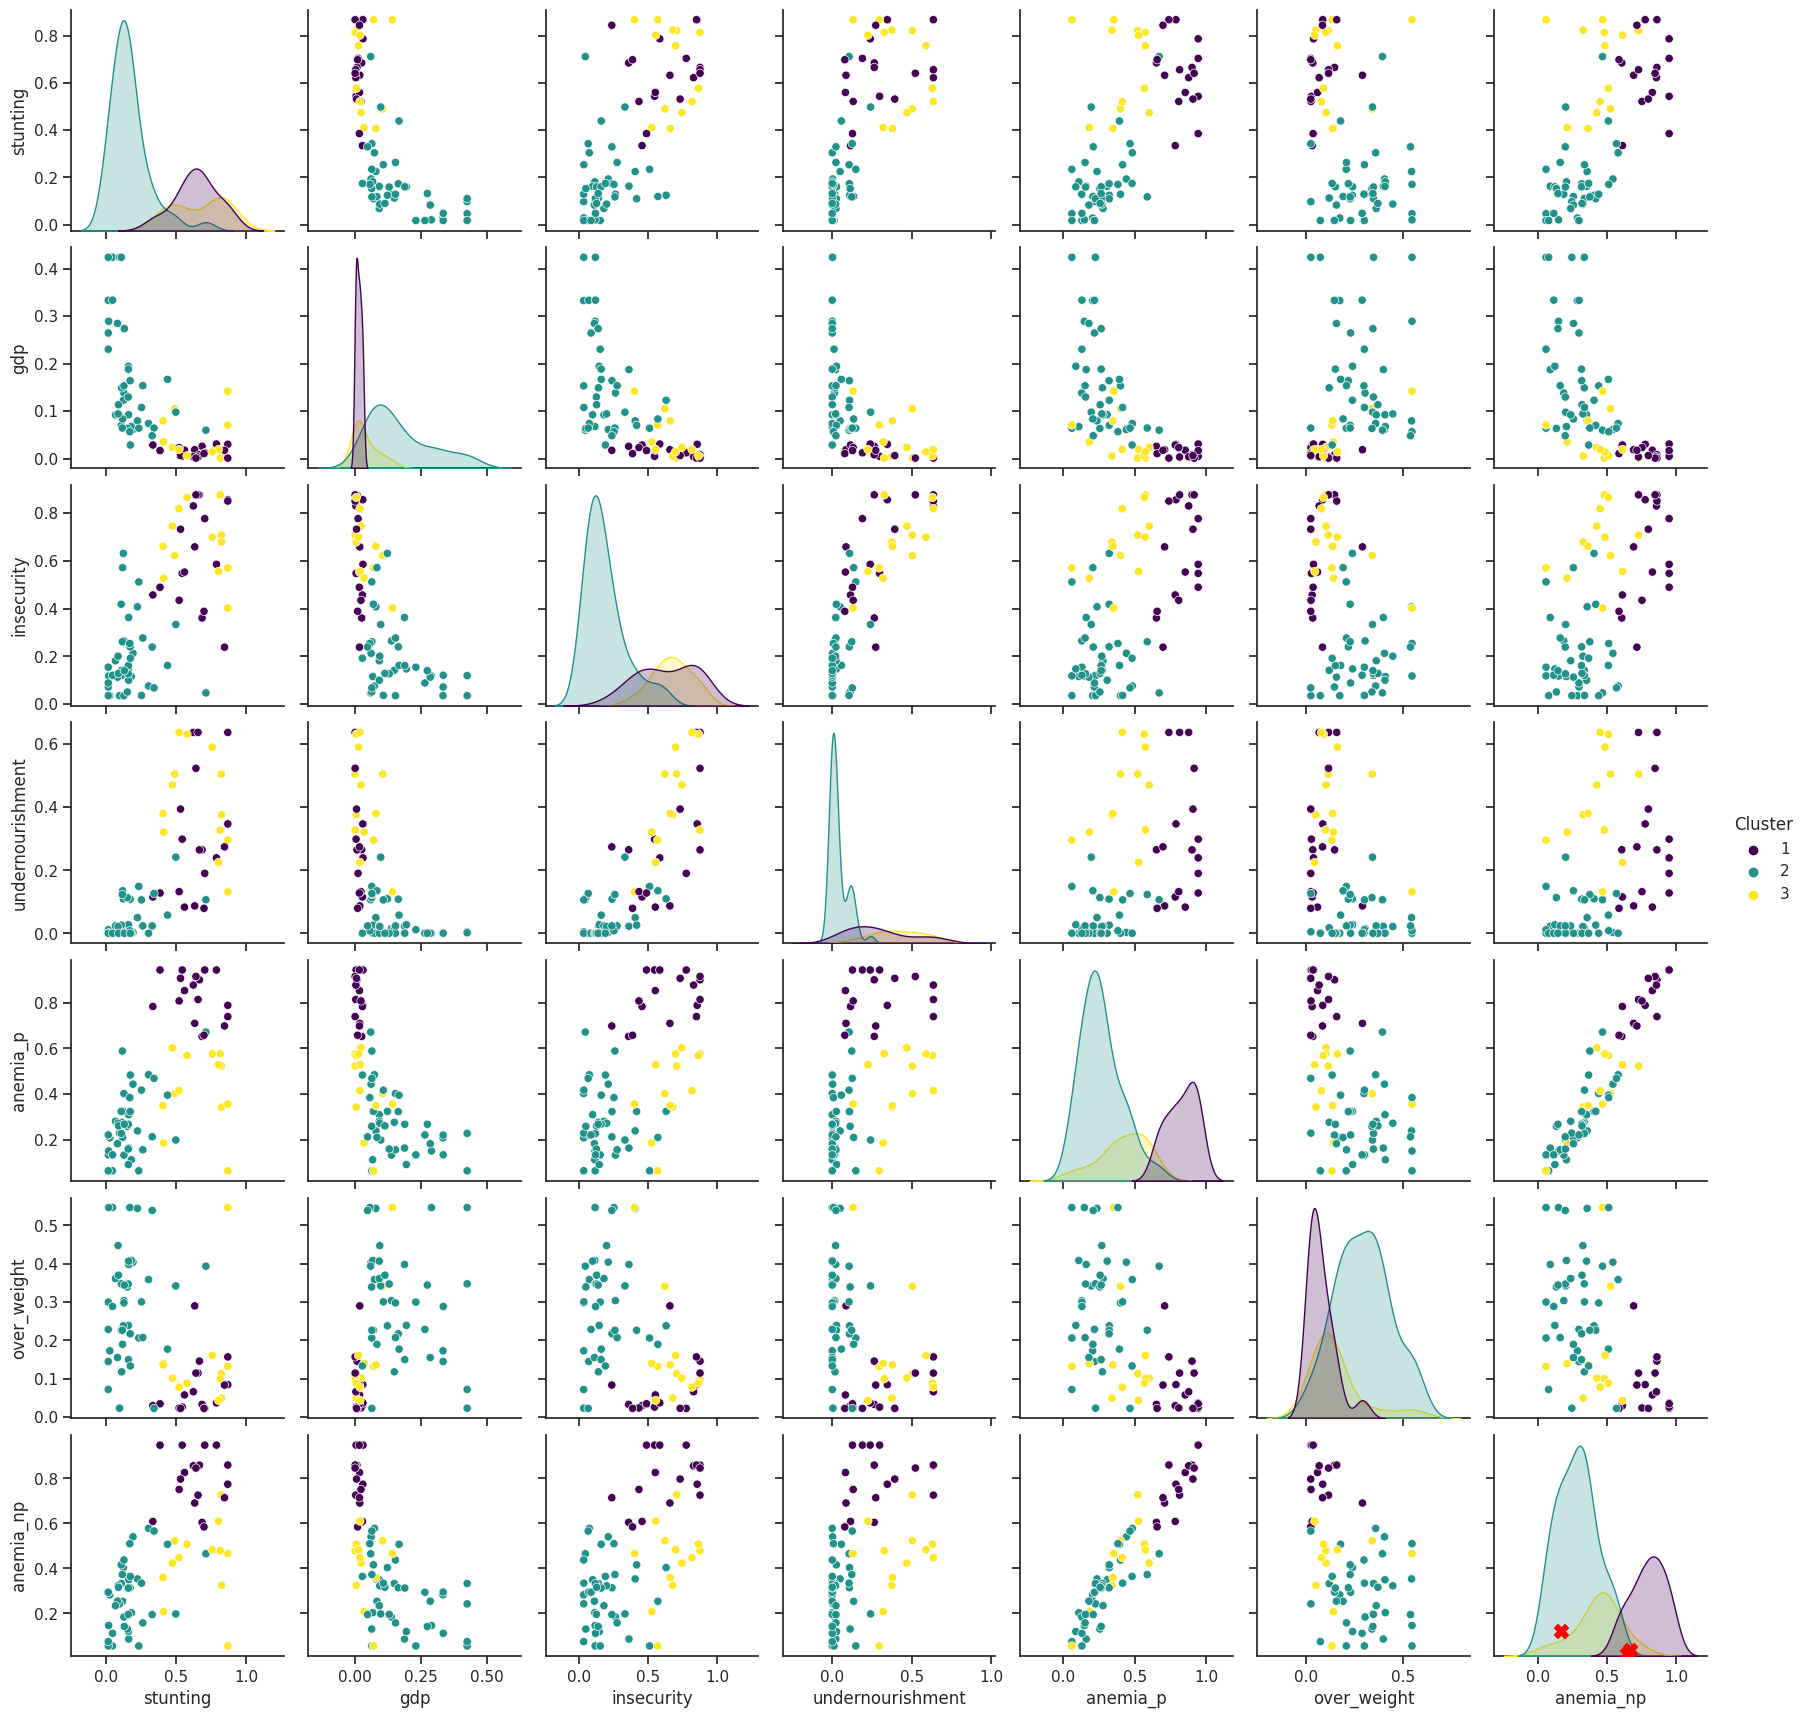

In [119]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df2.iloc[:, 1:])+1

data = df2.iloc[:, 1:].copy()
data['Cluster'] = labels
sns.pairplot(data, vars=df2.iloc[:, 1:], hue='Cluster', palette='viridis')
centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100, c='red', label='Centroids')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


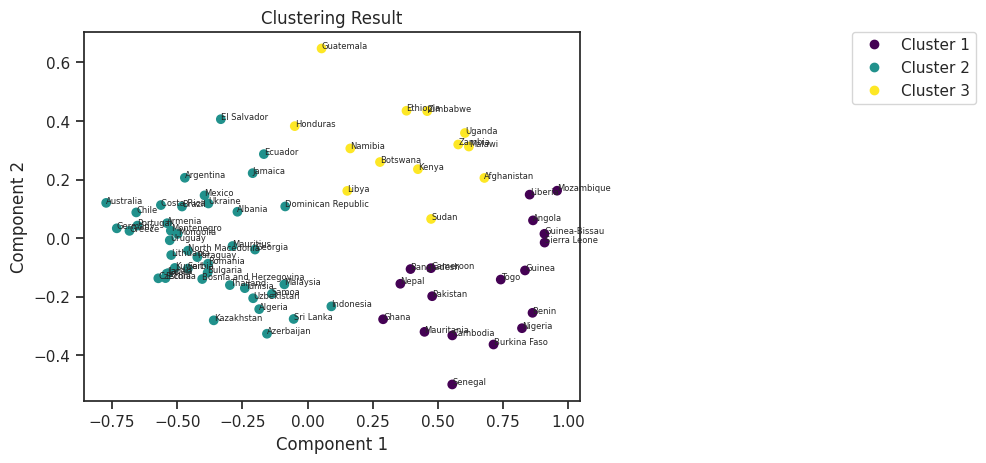

In [120]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df2.iloc[:, 1:])+1
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df2.iloc[:, 1:])
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', label='Data Points')
unique_labels = set(labels)
legend_labels = ['Cluster {}'.format(label) for label in unique_labels]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper right', bbox_to_anchor=(1.8, 1),
           borderaxespad=0.)

for i, txt in enumerate(df2.iloc[:, 0]):
    plt.annotate(txt, (pca_result[i, 0], pca_result[i, 1]), fontsize=6)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering Result')

plt.savefig('clustering_result.png', dpi=300)


In [121]:
df2['Cluster'] = labels

In [122]:
df2

GeoAreaName  stunting       gdp  insecurity  undernourishment  anemia_p  \
0   Afghanistan  0.820672  0.001128    0.708081          0.504852  0.522113   
1       Albania  0.224649  0.079518    0.407524          0.049617  0.237989   
2       Algeria  0.193022  0.061277    0.212558          0.002478  0.442571   
3        Angola  0.866971  0.030174    0.856156          0.346700  0.788101   
4     Argentina  0.162700  0.187464    0.362572          0.022087  0.162584   
..          ...       ...       ...         ...               ...       ...   
69      Ukraine  0.329312  0.048222    0.238824          0.023300  0.211899   
70      Uruguay  0.131399  0.273636    0.139755          0.000000  0.266942   
71   Uzbekistan  0.174112  0.028641    0.191933          0.000000  0.482660   
72       Zambia  0.756766  0.014175    0.699619          0.590448  0.574928   
73     Zimbabwe  0.520052  0.019257    0.818432          0.637010  0.413936   

    over_weight  anemia_np  Cluster  
0      0.112877   0.726259        3  
1      0.544110   0.353030        2  
2      0.403836   0.539946        2  
3      0.084384   0.773591        1  
4      0.397808   0.085921        2  
..          ...        ...      ...  
69     0.538630   0.194453        2  
70     0.344110   0.141694        2  
71     0.133151   0.364185        2  
72     0.160548   0.482364        3  
73     0.077808   0.447392        3  

[74 rows x 9 columns]

In [123]:
result_table = pd.concat([df2.iloc[:, 0], df2['Cluster']], axis=1)
print(result_table)

    GeoAreaName  Cluster
0   Afghanistan        3
1       Albania        2
2       Algeria        2
3        Angola        1
4     Argentina        2
..          ...      ...
69      Ukraine        2
70      Uruguay        2
71   Uzbekistan        2
72       Zambia        3
73     Zimbabwe        3

[74 rows x 2 columns]


In [124]:
cluster_stats = df2.groupby('Cluster').agg(['mean', 'std'])

print(cluster_stats)

         stunting                 gdp           insecurity            \
             mean       std      mean       std       mean       std   
Cluster                                                                
1        0.640927  0.148877  0.014544  0.010211   0.632856  0.208927   
2        0.166544  0.137549  0.169032  0.118255   0.188330  0.145641   
3        0.663615  0.184233  0.040203  0.045054   0.671808  0.137964   

        undernourishment            anemia_p           over_weight            \
                    mean       std      mean       std        mean       std   
Cluster                                                                        
1               0.296041  0.196112  0.826104  0.102406    0.075708  0.069368   
2               0.038335  0.056811  0.266151  0.140302    0.293520  0.139597   
3               0.414882  0.157191  0.421523  0.164223    0.155996  0.138613   

        anemia_np            
             mean       std  
Cluster                   

<ipython-input-124-2d2481993bee>:1: FutureWarning: ['GeoAreaName'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_stats = df2.groupby('Cluster').agg(['mean', 'std'])


In [125]:
df2

GeoAreaName  stunting       gdp  insecurity  undernourishment  anemia_p  \
0   Afghanistan  0.820672  0.001128    0.708081          0.504852  0.522113   
1       Albania  0.224649  0.079518    0.407524          0.049617  0.237989   
2       Algeria  0.193022  0.061277    0.212558          0.002478  0.442571   
3        Angola  0.866971  0.030174    0.856156          0.346700  0.788101   
4     Argentina  0.162700  0.187464    0.362572          0.022087  0.162584   
..          ...       ...       ...         ...               ...       ...   
69      Ukraine  0.329312  0.048222    0.238824          0.023300  0.211899   
70      Uruguay  0.131399  0.273636    0.139755          0.000000  0.266942   
71   Uzbekistan  0.174112  0.028641    0.191933          0.000000  0.482660   
72       Zambia  0.756766  0.014175    0.699619          0.590448  0.574928   
73     Zimbabwe  0.520052  0.019257    0.818432          0.637010  0.413936   

    over_weight  anemia_np  Cluster  
0      0.112877   0.726259        3  
1      0.544110   0.353030        2  
2      0.403836   0.539946        2  
3      0.084384   0.773591        1  
4      0.397808   0.085921        2  
..          ...        ...      ...  
69     0.538630   0.194453        2  
70     0.344110   0.141694        2  
71     0.133151   0.364185        2  
72     0.160548   0.482364        3  
73     0.077808   0.447392        3  

[74 rows x 9 columns]